In [ ]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import seaborn as sns
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

**importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv(r'/content/drive/MyDrive/uni works/Machine learning/Labs/ML Lab 01/train.csv')
valid = pd.read_csv(r'/content/drive/MyDrive/uni works/Machine learning/Labs/ML Lab 01/valid.csv')
test = pd.read_csv(r'/content/drive/MyDrive/uni works/Machine learning/Labs/ML Lab 01/test.csv')
train_original=train.copy()
test_original=test.copy()
valid_original=valid.copy()

**Aanaysis the data set**

In [ ]:
train_original.shape

(28520, 260)

In [ ]:
train_original.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_251', 'feature_252', 'feature_253', 'feature_254',
       'feature_255', 'feature_256', 'label_1', 'label_2', 'label_3',
       'label_4'],
      dtype='object', length=260)

In [ ]:
train_original.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
missing_counts = train_original.isnull().sum()
for column, count in missing_counts.items():
    print(f"Column '{column}': {count} missing values")

Column 'feature_1': 0 missing values
Column 'feature_2': 0 missing values
Column 'feature_3': 0 missing values
Column 'feature_4': 0 missing values
Column 'feature_5': 0 missing values
Column 'feature_6': 0 missing values
Column 'feature_7': 0 missing values
Column 'feature_8': 0 missing values
Column 'feature_9': 0 missing values
Column 'feature_10': 0 missing values
Column 'feature_11': 0 missing values
Column 'feature_12': 0 missing values
Column 'feature_13': 0 missing values
Column 'feature_14': 0 missing values
Column 'feature_15': 0 missing values
Column 'feature_16': 0 missing values
Column 'feature_17': 0 missing values
Column 'feature_18': 0 missing values
Column 'feature_19': 0 missing values
Column 'feature_20': 0 missing values
Column 'feature_21': 0 missing values
Column 'feature_22': 0 missing values
Column 'feature_23': 0 missing values
Column 'feature_24': 0 missing values
Column 'feature_25': 0 missing values
Column 'feature_26': 0 missing values
Column 'feature_27': 

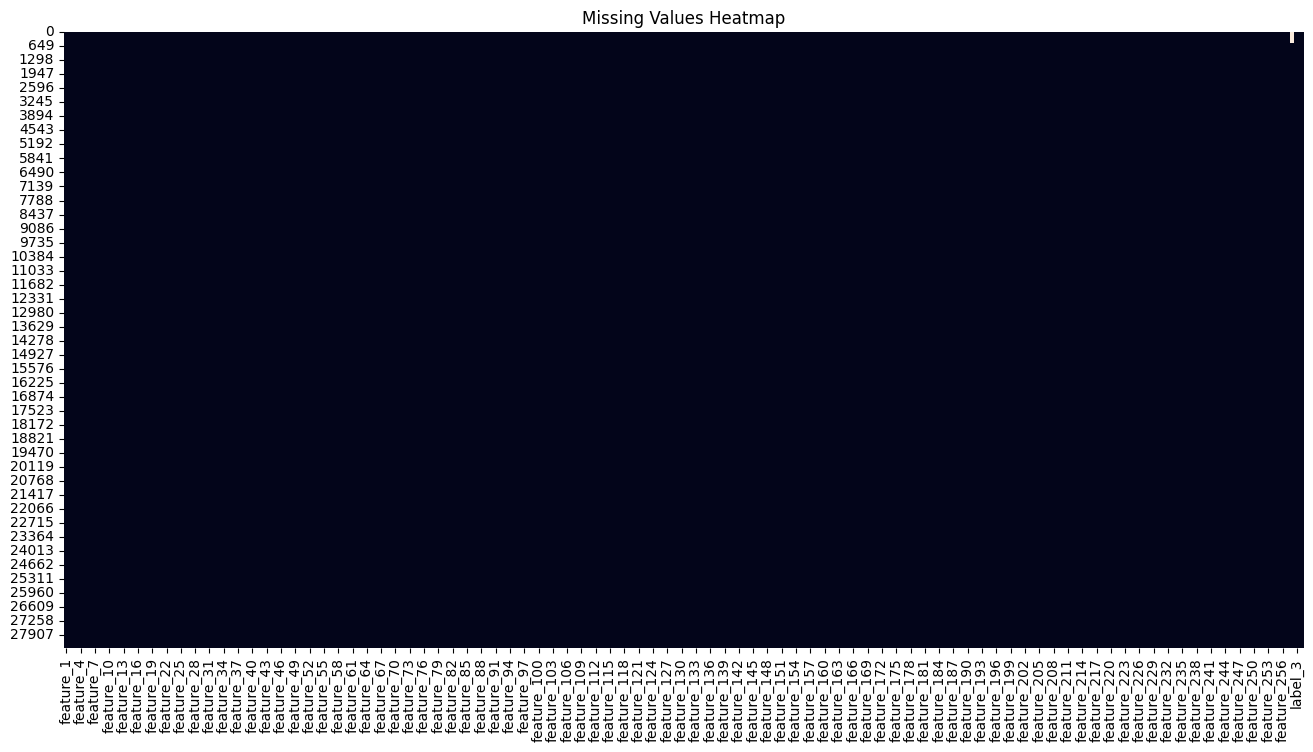

In [ ]:
missing_matrix = train_original.isnull()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(missing_matrix, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

**Handling the missing value**

In [ ]:
# drop the label_2 coloumn
df_clean = train_original.drop(columns='label_2')
df_clean.reset_index(drop = True, inplace = True)

In [ ]:
# Drop the row that contain missing value
df_clean = df_clean.dropna()
df_clean.reset_index(drop = True, inplace = True)

In [ ]:
df_clean.shape

(28520, 259)

**Analysis the label**

In [ ]:
df_clean['label_1'].unique()

array([45,  5, 60, 19, 11, 52, 25, 46, 51, 35, 56, 53,  3, 40, 43, 58, 44,
       37, 55, 17,  2, 47, 54, 21, 34, 23, 10, 28, 20,  7,  6,  4, 48, 32,
       12, 22, 38, 36, 59, 50, 14, 15, 24, 13, 29, 18,  1,  9, 49, 27, 42,
       26, 41, 57,  8, 33, 31, 16, 30, 39])

In [ ]:
pd.Series(df_clean['label_1']).value_counts()

12    485
35    484
26    483
60    482
24    482
25    481
59    481
10    481
54    481
45    480
41    480
9     480
2     479
42    479
47    479
6     479
56    479
34    478
52    478
3     478
14    478
33    478
43    477
1     477
13    477
20    477
23    477
30    476
51    476
32    476
53    476
22    476
38    476
49    476
55    475
28    474
8     474
40    474
48    474
21    474
4     474
39    473
17    473
7     473
15    472
58    472
5     471
27    471
31    470
19    469
11    469
46    469
29    469
36    468
16    468
50    467
37    467
44    467
57    466
18    465
Name: label_1, dtype: int64

In [ ]:
pd.Series(train_original['label_2']).value_counts()

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: label_2, dtype: int64

In [ ]:
df_clean['label_3'].unique()

array([1, 0])

In [ ]:
df_clean['label_4'].unique()

array([ 6, 13,  4,  5,  1,  2,  7,  3,  0, 12,  9,  8, 11, 10])

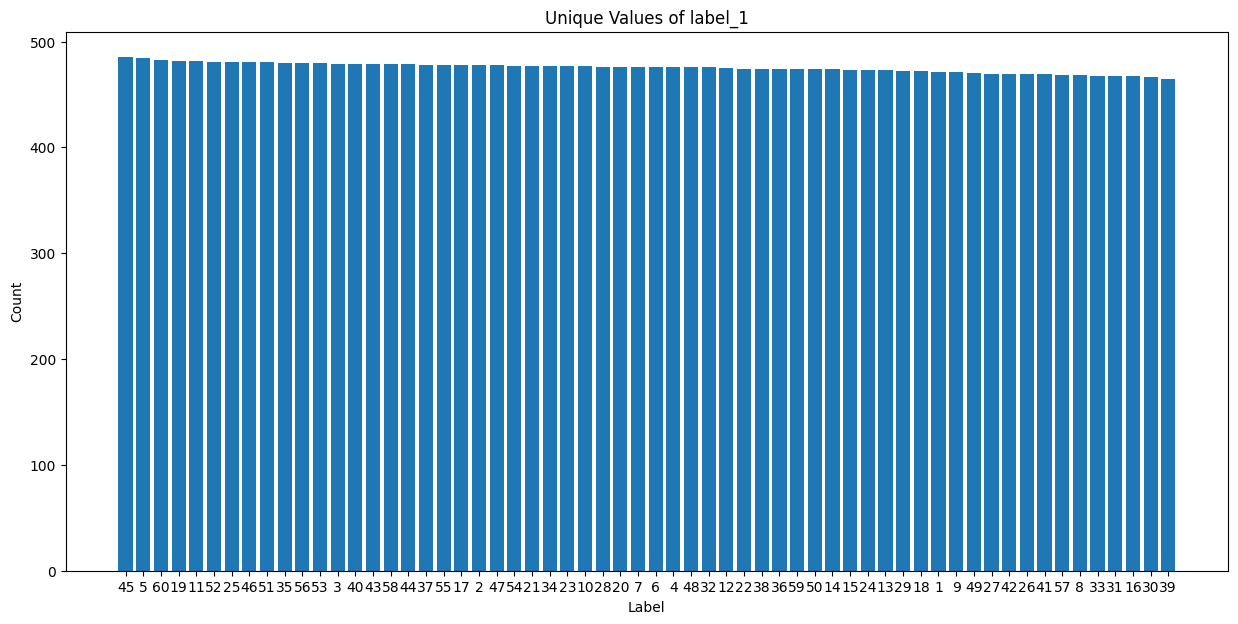

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
# Get the unique values of the 'label_4' column
unique_labels = df_clean['label_1'].unique()
unique_labels=unique_labels.astype(str)
# Count the occurrences of each unique label
label_counts = df_clean['label_1'].value_counts()

# Create a bar plot
plt.bar(unique_labels, label_counts)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Unique Values of label_1')

# Show the plot
plt.show()

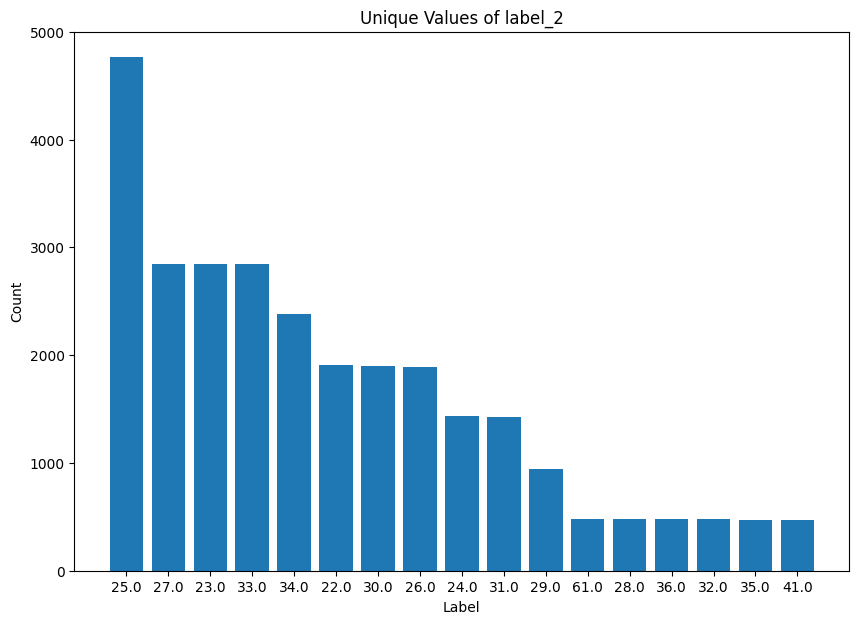

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
# Get the unique values of the 'label_4' column
unique_labels = train_original['label_2'].unique()
nan_mask = np. isnan(unique_labels)
unique_labels=unique_labels[~nan_mask]
unique_labels=unique_labels.astype(str)
# Count the occurrences of each unique label
label_counts = train_original['label_2'].value_counts()
# Create a bar plot
plt.bar(unique_labels, label_counts)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Unique Values of label_2')

# Show the plot
plt.show()

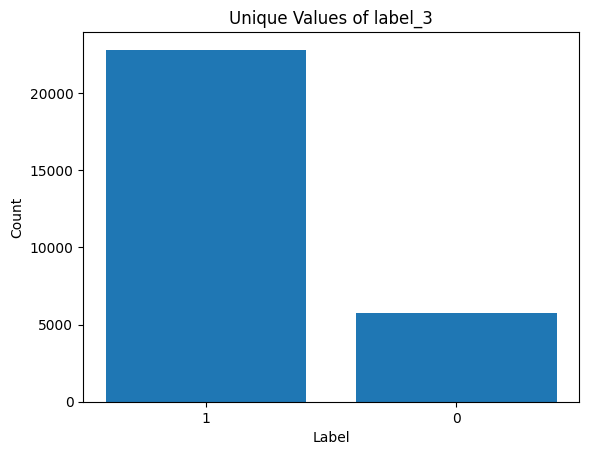

In [ ]:
import matplotlib.pyplot as plt

# Get the unique values of the 'label_4' column
unique_labels = df_clean['label_3'].unique()
unique_labels=unique_labels.astype(str)
# Count the occurrences of each unique label
label_counts = df_clean['label_3'].value_counts()

# Create a bar plot
plt.bar(unique_labels, label_counts)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Unique Values of label_3')

# Show the plot
plt.show()

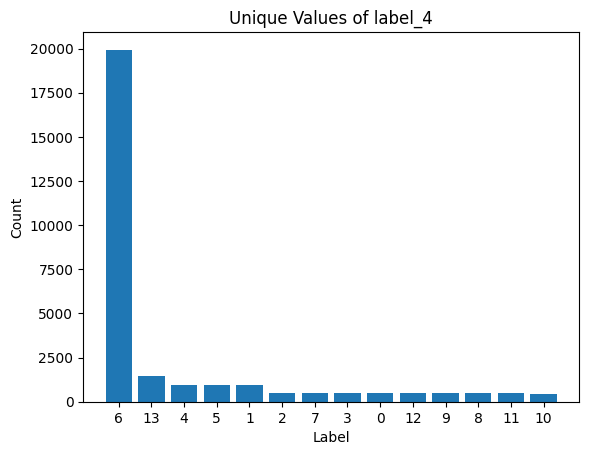

In [ ]:
import matplotlib.pyplot as plt

# Get the unique values of the 'label_4' column
unique_labels = df_clean['label_4'].unique()
unique_labels=unique_labels.astype(str)
# Count the occurrences of each unique label
label_counts = df_clean['label_4'].value_counts()

# Create a bar plot
plt.bar(unique_labels, label_counts)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Unique Values of label_4')

# Show the plot
plt.show()

In [ ]:
df_clean.shape

(28520, 259)

In [ ]:
df_clean.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,1,6


In [ ]:
df_correlation =df_clean.corr()

<Axes: >

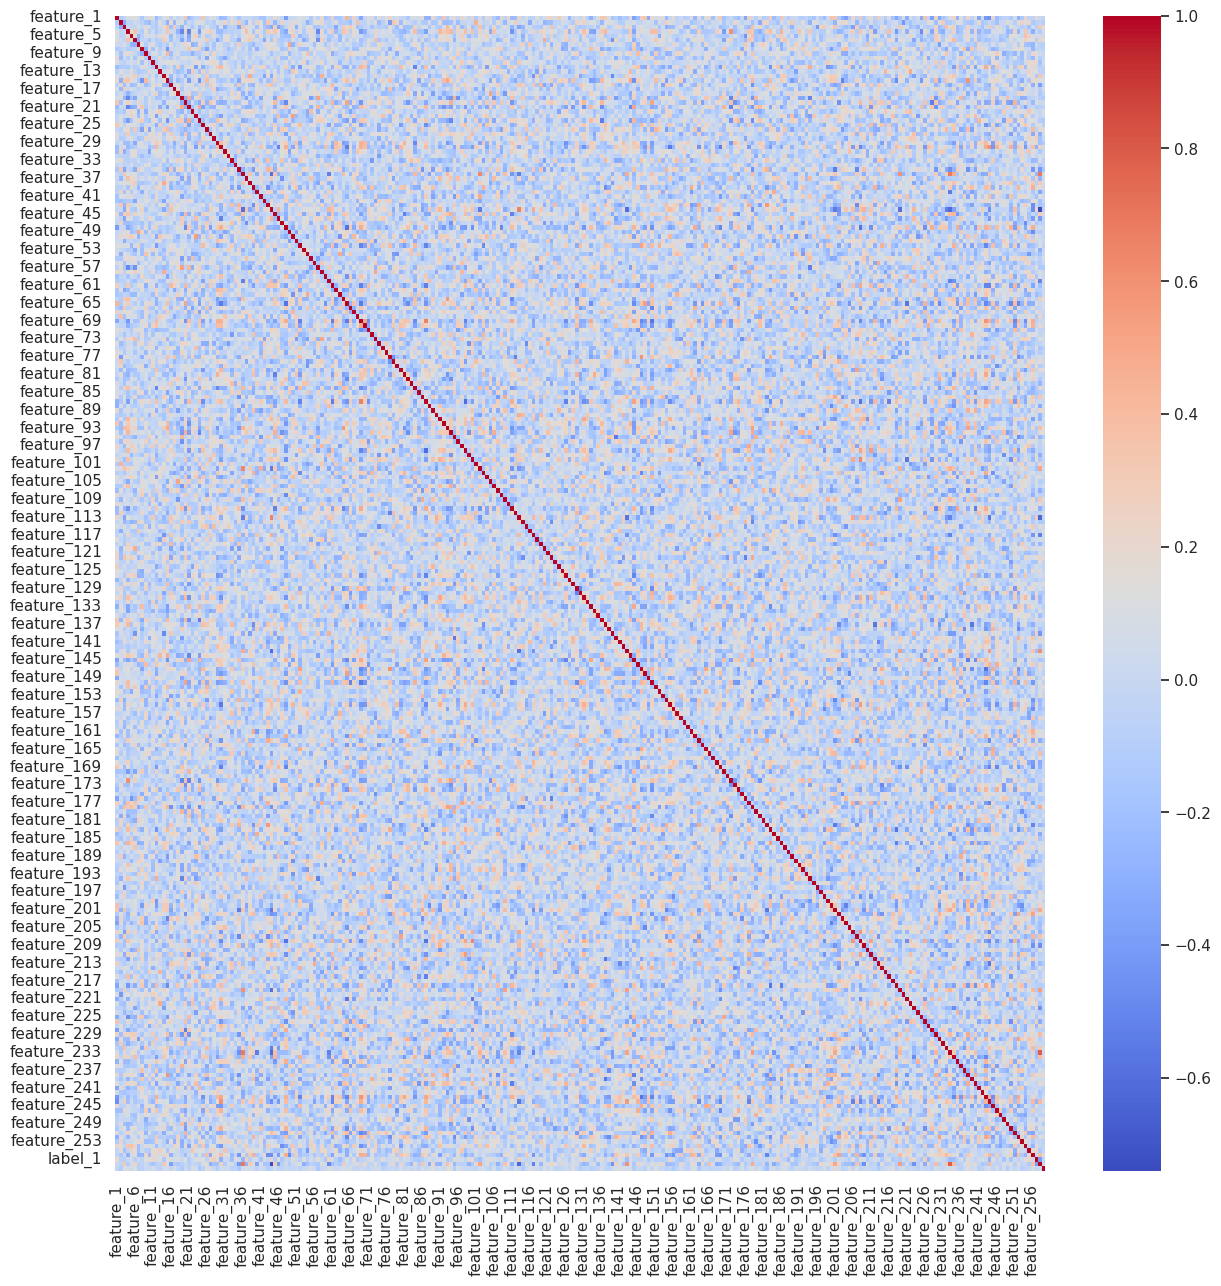

In [ ]:
#correlation matrix
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(df_correlation, annot = False, fmt='.2g',cmap= 'coolwarm')

In [ ]:
# plt.figure(figsize=(30,30))
# sns.heatmap(df_correlation,cbar=True,square=True,fmt='.1f',annot=False,annot_kws={'size':8},cmap='Blues')

**Filter method**

In [ ]:
df_clean.shape

(28520, 259)

In [ ]:
df_clean.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,1,6


In [ ]:
data= df_clean.values
X=data[:,0:256]
Y_1=np.array(data[:,256])
Y_1=np.asarray(Y_1, dtype = 'int')
Y_3=data[:,257]
Y_4=data[:,258]

In [ ]:
testt = test.values
X_test=testt[:,0:256]
Y_test1=np.array(testt[:,256])
Y_test1=np.asarray(Y_test1, dtype = 'int')
Y_test2=np.array(testt[:,257])
Y_test2=np.asarray(Y_test2, dtype = 'int')
Y_test3=np.array(testt[:,258])
Y_test3=np.asarray(Y_test3, dtype = 'int')
Y_test4=np.array(testt[:,259])
Y_test4=np.asarray(Y_test4, dtype = 'int')

In [ ]:
valid_data =valid_original.values
X_valid=valid_data[:,0:256]
Y_valid1=np.array(valid_data[:,256])
Y_valid1=np.asarray(Y_valid1, dtype = 'int')
Y_valid2=np.array(valid_data[:,257])
Y_valid2=np.asarray(Y_valid2, dtype = 'int')
Y_valid3=np.array(valid_data[:,258])
Y_valid3=np.asarray(Y_valid3, dtype = 'int')
Y_valid4=np.array(valid_data[:,259])
Y_valid4=np.asarray(Y_valid4, dtype = 'int')

In [ ]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


##Before feature engineering

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

In [ ]:
def randomForest_before_feature_engineering(X,Y,X_valid,Y_valid,X_test,isAccuracy):
  # Train a random forest classifier
  clf = RandomForestClassifier(random_state=42)
  clf.fit(X, Y)
  # Make predictions on the valid data set
  Y_pred = clf.predict(X_valid)
  # Make predictions on the test data set
  Y_test = clf.predict(X_test)
  if(isAccuracy):
    # Calculate accuracy
    accuracy = accuracy_score(Y_valid, Y_pred)
    print("Accuracy:", accuracy)
  else:
    # Calculate F score
    accuracy = f1_score(Y_valid, Y_pred,average='micro')
    print("F score:", accuracy)
  return Y_test


###Label-1

In [ ]:
Y_test_1= randomForest_before_feature_engineering(X,Y_1,X_valid,Y_valid1,X_test,True)

Accuracy: 0.968


###Label-2

In [ ]:
# Drop the row that contain missing value
df_clean_1 = train_original.dropna()
df_clean_1.reset_index(drop = True, inplace = True)
data_1= df_clean_1.values
Y_2 = data_1[:,257]
X_1 = data_1[:,0:256]

In [ ]:
# Drop the row that contain missing value
valid_1 = valid_original.dropna()
valid_1.reset_index(drop = True, inplace = True)
valid_dataset_1= valid_1.values
Y_valid_2 = valid_dataset_1[:,257]
X_valid_1 = valid_dataset_1[:,0:256]

In [ ]:
Y_test_2= randomForest_before_feature_engineering(X_1,Y_2,X_valid_1,Y_valid_2,X_test,False)

F score: 0.9225543478260869


###Label-3

In [ ]:
Y_test_3= randomForest_before_feature_engineering(X,Y_3,X_valid,Y_valid3,X_test,False)

F score: 0.9946666666666667


###Label-4

In [ ]:
Y_test_4= randomForest_before_feature_engineering(X,Y_4,X_valid,Y_valid4,X_test,False)

F score: 0.844


##Noraml method

In [ ]:
def RandomForest(isAccuracy,df_clean,X,Y,Y_valid,valid,test,Y_test,isDiagramNeed=True,score=0.003,dropLableList=['label_1','label_2','label_3','label_4']):
  feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
  forest = RandomForestClassifier(random_state=0)
  forest.fit(X, Y)
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
  forest_importances = pd.Series(importances, index=feature_names)
  if(isDiagramNeed):
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
  label_feature_drop_list=[]
  # print(np.min(forest_importances.values()))
  for key,value  in forest_importances.items():
    if(value<score):
      label_feature_drop_list.append(key)
  label_x_valid =label_feature_drop_list.copy()
  label_x_valid.extend(dropLableList)
  print("number of features drop in the list out of 256:",len(label_feature_drop_list))
  label_x_train=df_clean
  label_x_train = df_clean.drop(columns=label_feature_drop_list)
  X_train=''
  # Extract features and labels
  if 'label_2' not in label_x_train:
    X_train = label_x_train.drop(columns=['label_1','label_3','label_4'])
  else :
    X_train = label_x_train.drop(columns=['label_1','label_2','label_3','label_4'])
  Y_train = Y
  X_valid = valid.drop(columns=label_x_valid)
  X_test = test.drop(columns=label_x_valid)

  # Standardize the features
  X_train_scaled , X_valid_scaled , X_test_scaled = scaling(X_train,X_valid,X_test)

  # Train a random forest classifier
  clf = RandomForestClassifier(random_state=42)
  clf.fit(X_train_scaled, Y_train)
  # Make predictions on the test data set
  Y_test_pred = clf.predict(X_test_scaled)
  # Make predictions on the valid data set
  Y_valid_pred = clf.predict(X_valid_scaled)
  outputDict ={}
  outputDict['Predicted labels before feature engineering']= Y_test
  outputDict['Predicted labels after feature engineering']= Y_test_pred
  outputDict['No of new features']=['' for j in range(X_test_scaled.shape[0])]
  for i in  range(0,256) :
    col_name="new_feature_"+str(i+1)
    if(i<X_test_scaled.shape[1]):
      outputDict[col_name] = X_test_scaled[:,i]
    else:
      outputDict[col_name]=[0 for j in range(X_test_scaled.shape[0])]

  if(isAccuracy):
    # Calculate accuracy
    accuracy = accuracy_score(Y_valid, Y_valid_pred)
    print("Accuracy:", accuracy)
  else:
    # Calculate F score
    accuracy = f1_score(Y_valid, Y_valid_pred,average='micro')
    print("F score:", accuracy)
  df = pd.DataFrame(outputDict)
  df['No of new features'] = X_test_scaled.shape[1]
  return df

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
def scaling(X_train,x_valid,X_test):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_valid_scaled = scaler.transform(x_valid)
  X_test_scaled = scaler.transform(X_test)
  return X_train_scaled,X_valid_scaled,X_test_scaled

In [ ]:
from google.colab import files
""" Function to download data as a csv file"""
def download_csv(data,filename):

  """
    To download output as CSV files

    Args:
        data (pd.DataFrame): DataFrame Object.
        filename (str): Name of the file has to be faved.

    Returns:
        None
  """

  filename= filename + '.csv'
  data.to_csv(filename, encoding = 'utf-8-sig',index= False)
  files.download(filename)

**Label_1**

number of features drop in the list out of 256: 0
Accuracy: 0.9666666666666667


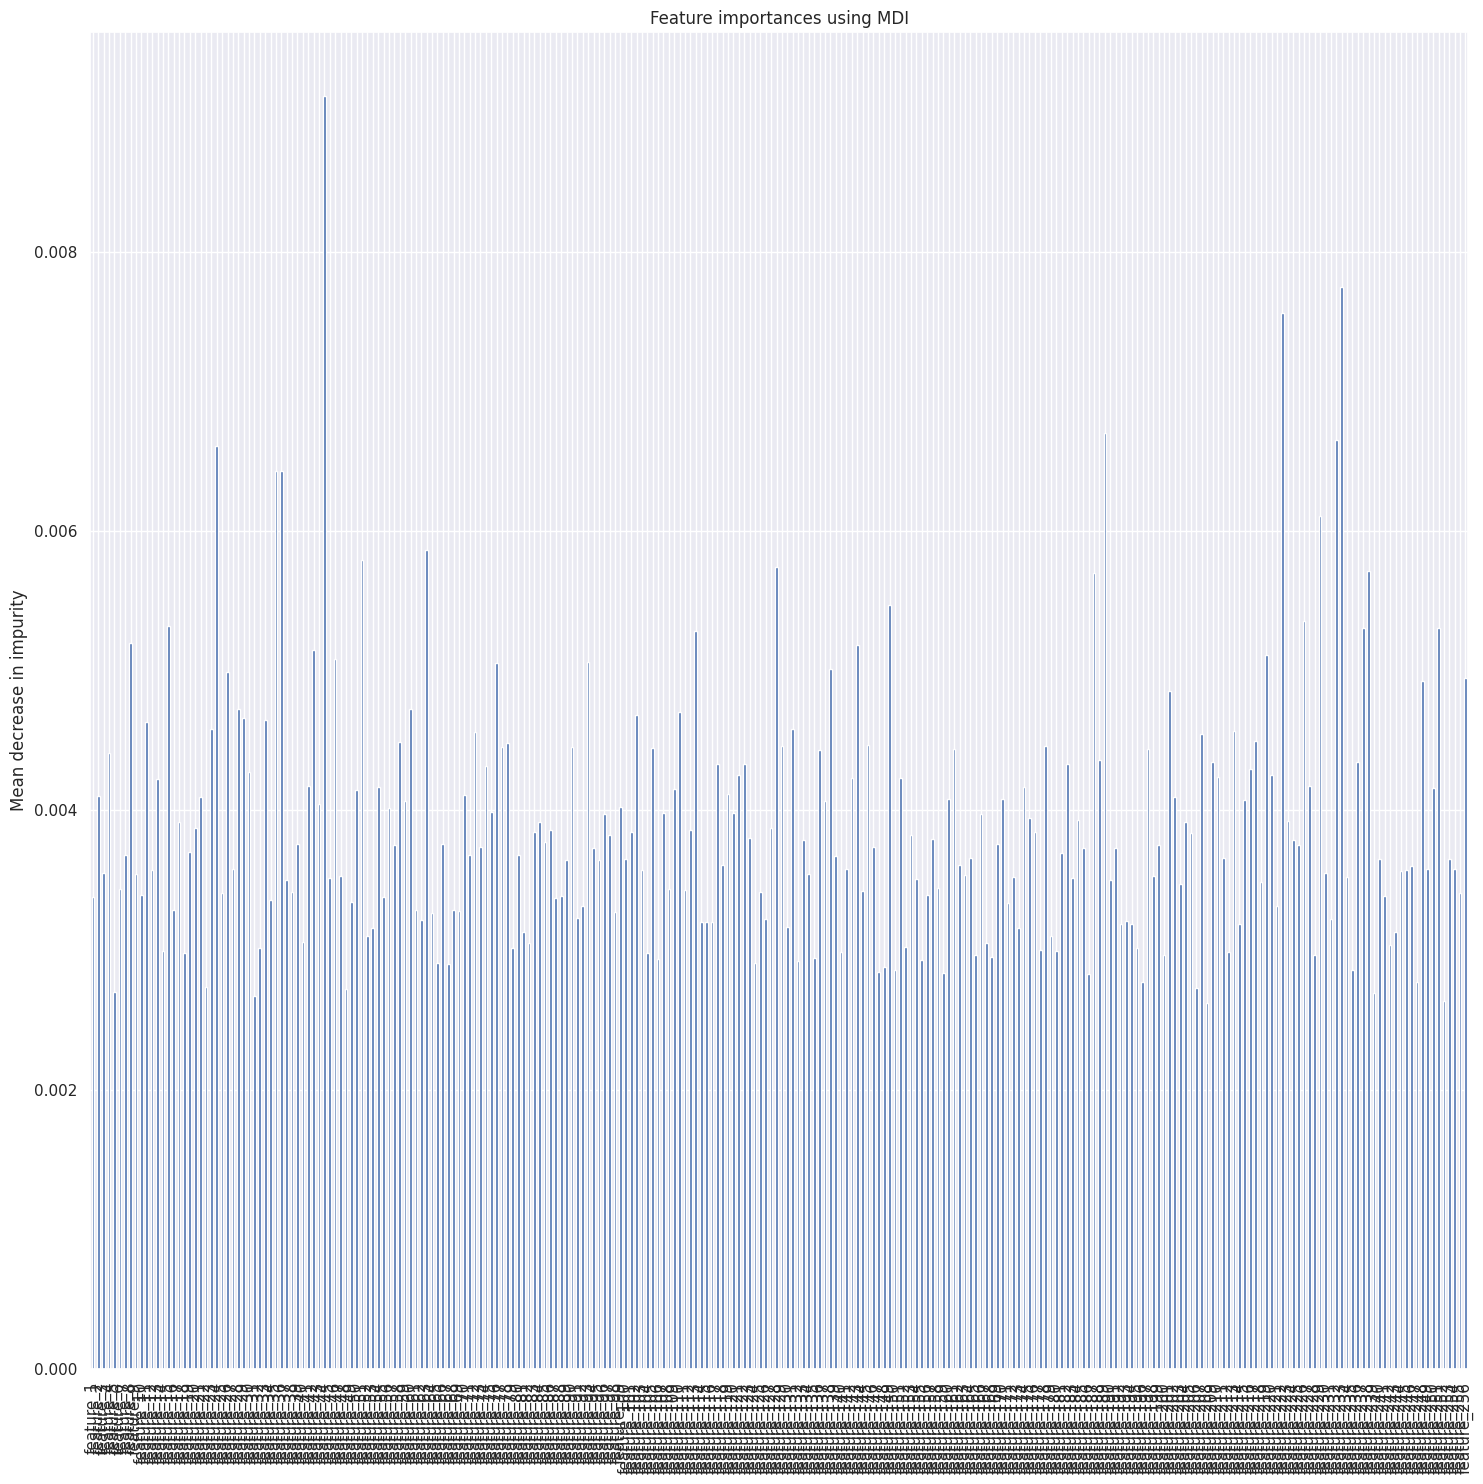

In [ ]:
file_noraml_label_1 =RandomForest(True,df_clean,X,Y_1,Y_valid1,valid,test,Y_test_1,isDiagramNeed=True,score=0.002)

In [ ]:
file_noraml_label_1_3 =RandomForest(True,df_clean,X,Y_1,Y_valid1,valid,test,Y_test_1,isDiagramNeed=False,score=0.003)

number of features drop in the list out of 256: 34
Accuracy: 0.976


In [ ]:
download_csv(file_noraml_label_1_3,'190058R_Lab-1_label-1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_noraml_label_1_2 =RandomForest(True,df_clean,X,Y_1,Y_valid1,valid,test,Y_test_1,isDiagramNeed=False,score=0.0035)

number of features drop in the list out of 256: 89
Accuracy: 0.9746666666666667


**Label_2**

In [ ]:
len(Y_2)

28040

In [ ]:
len(X_1)

28040

In [ ]:
df_clean_1['label_2'].unique()

array([25., 27., 23., 33., 34., 22., 30., 26., 24., 31., 29., 61., 28.,
       36., 32., 35., 41.])

number of features drop in the list out of 256: 23
F score: 0.9225543478260869


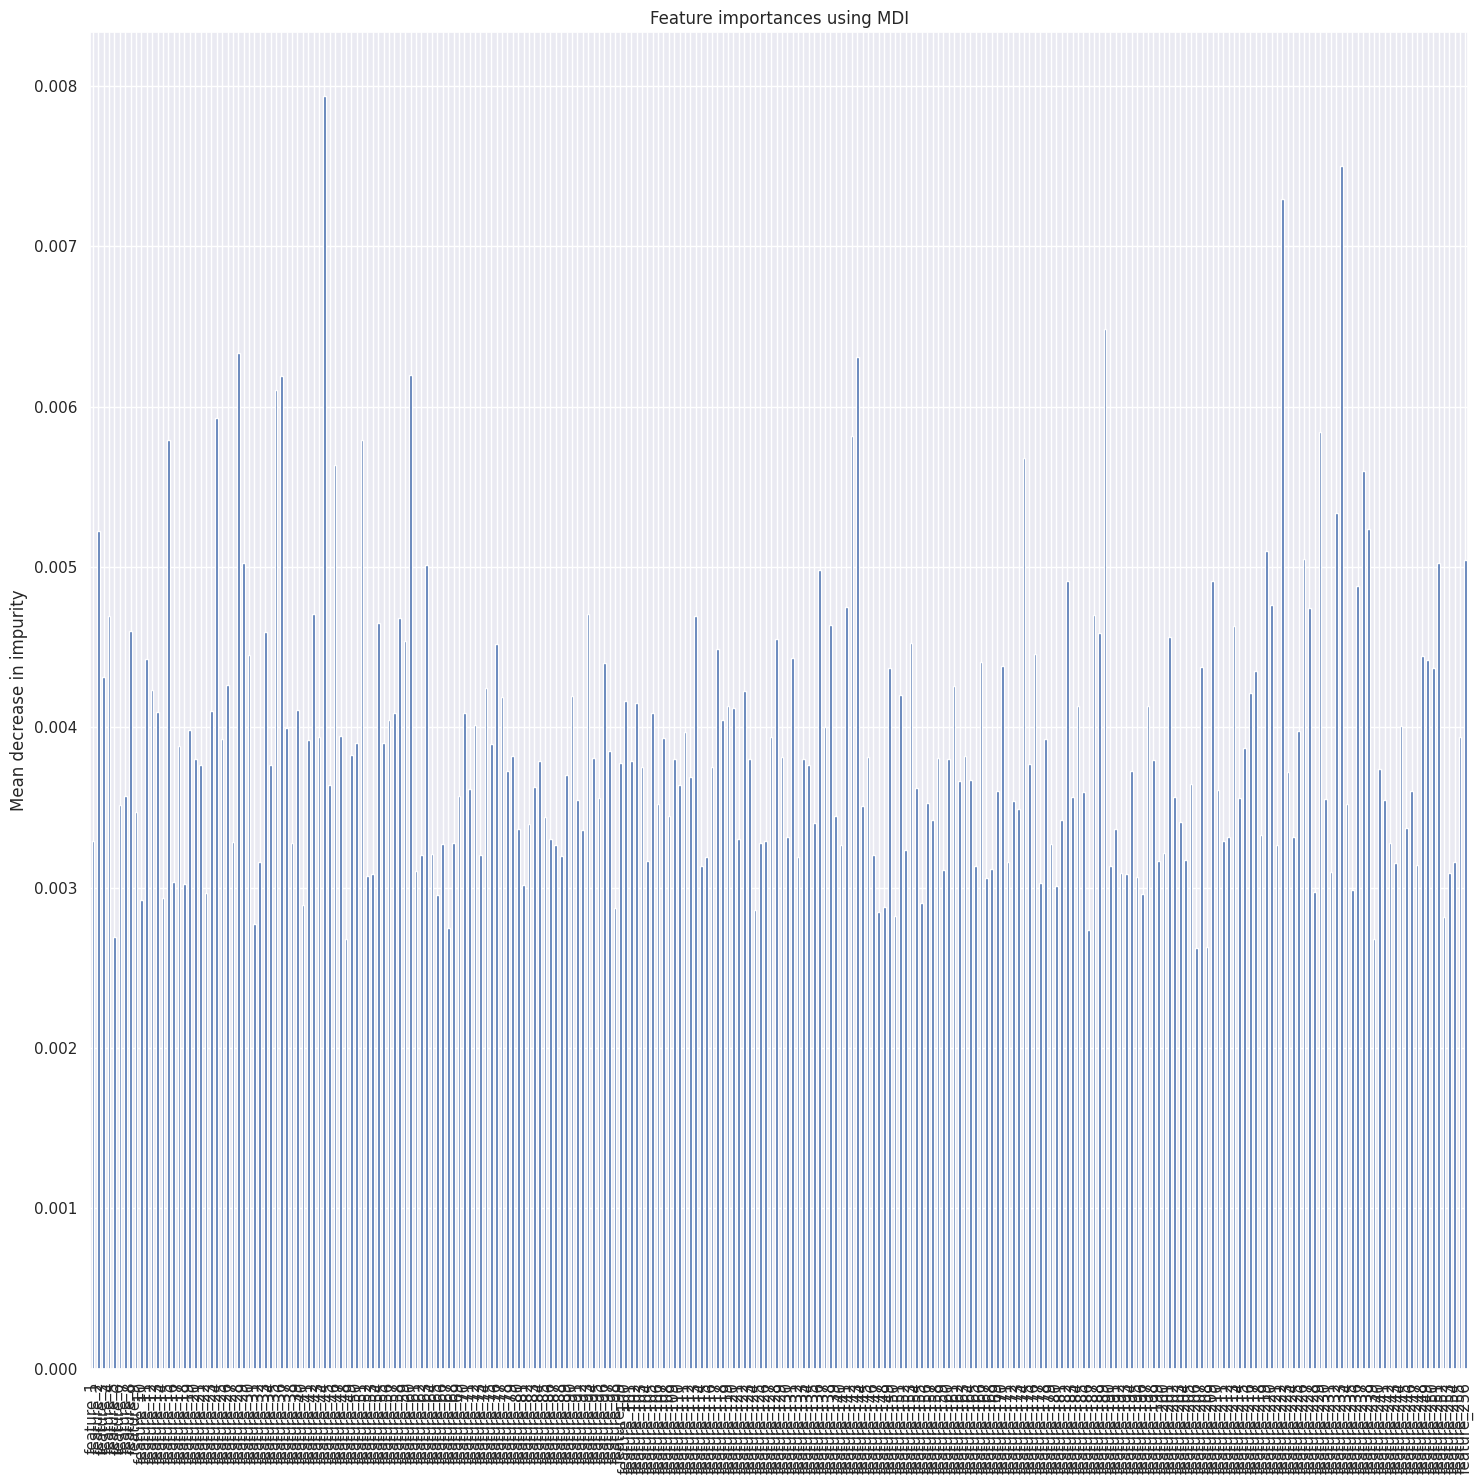

In [ ]:
file_noraml_label_2_1 = RandomForest(False,df_clean_1,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,isDiagramNeed=True,score=0.003)

number of features drop in the list out of 256: 5
F score: 0.9375


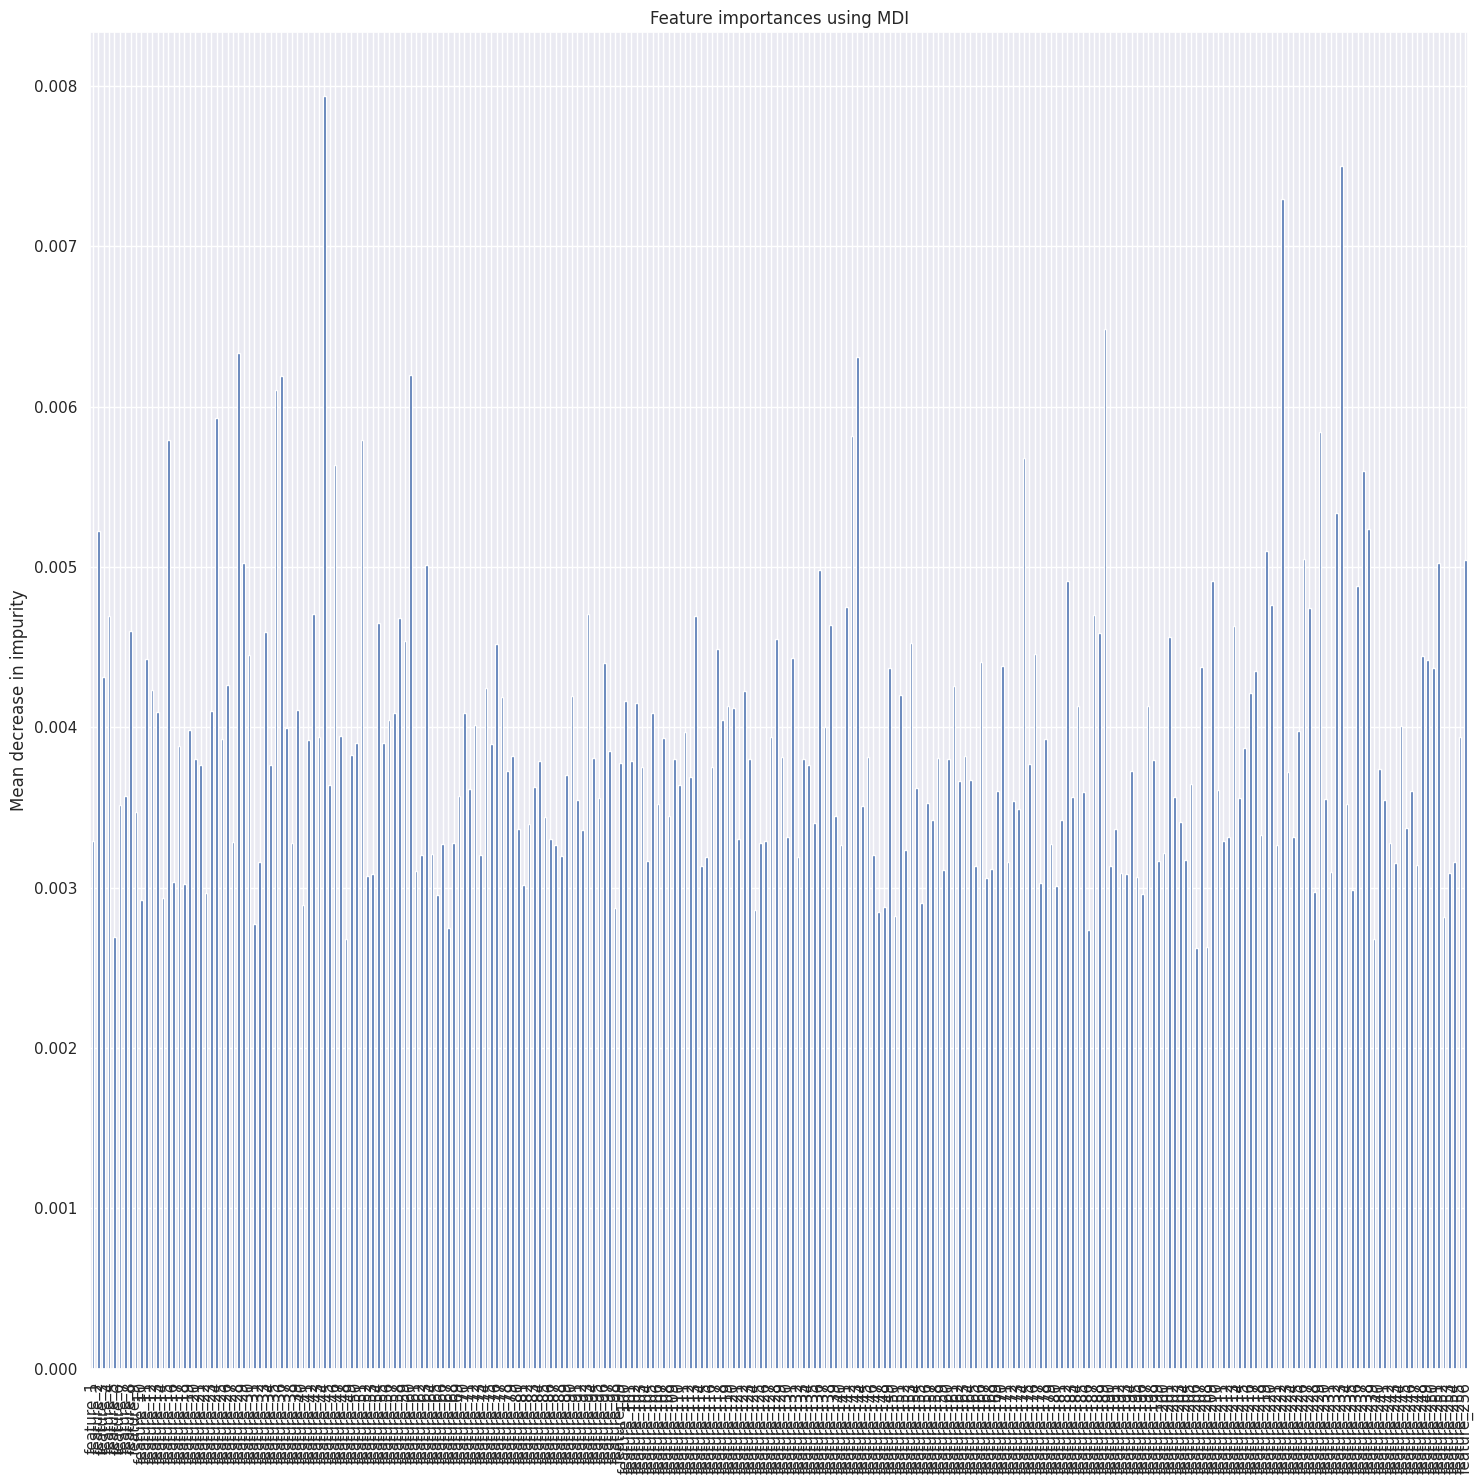

In [ ]:
file_noraml_label_2_2 = RandomForest(False,df_clean_1,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,isDiagramNeed=True,score=0.0027)

In [ ]:
download_csv(file_noraml_label_2_2,'190058R_Lab-1_label-2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Label_3**

number of features drop in the list out of 256: 59
F score: 0.996


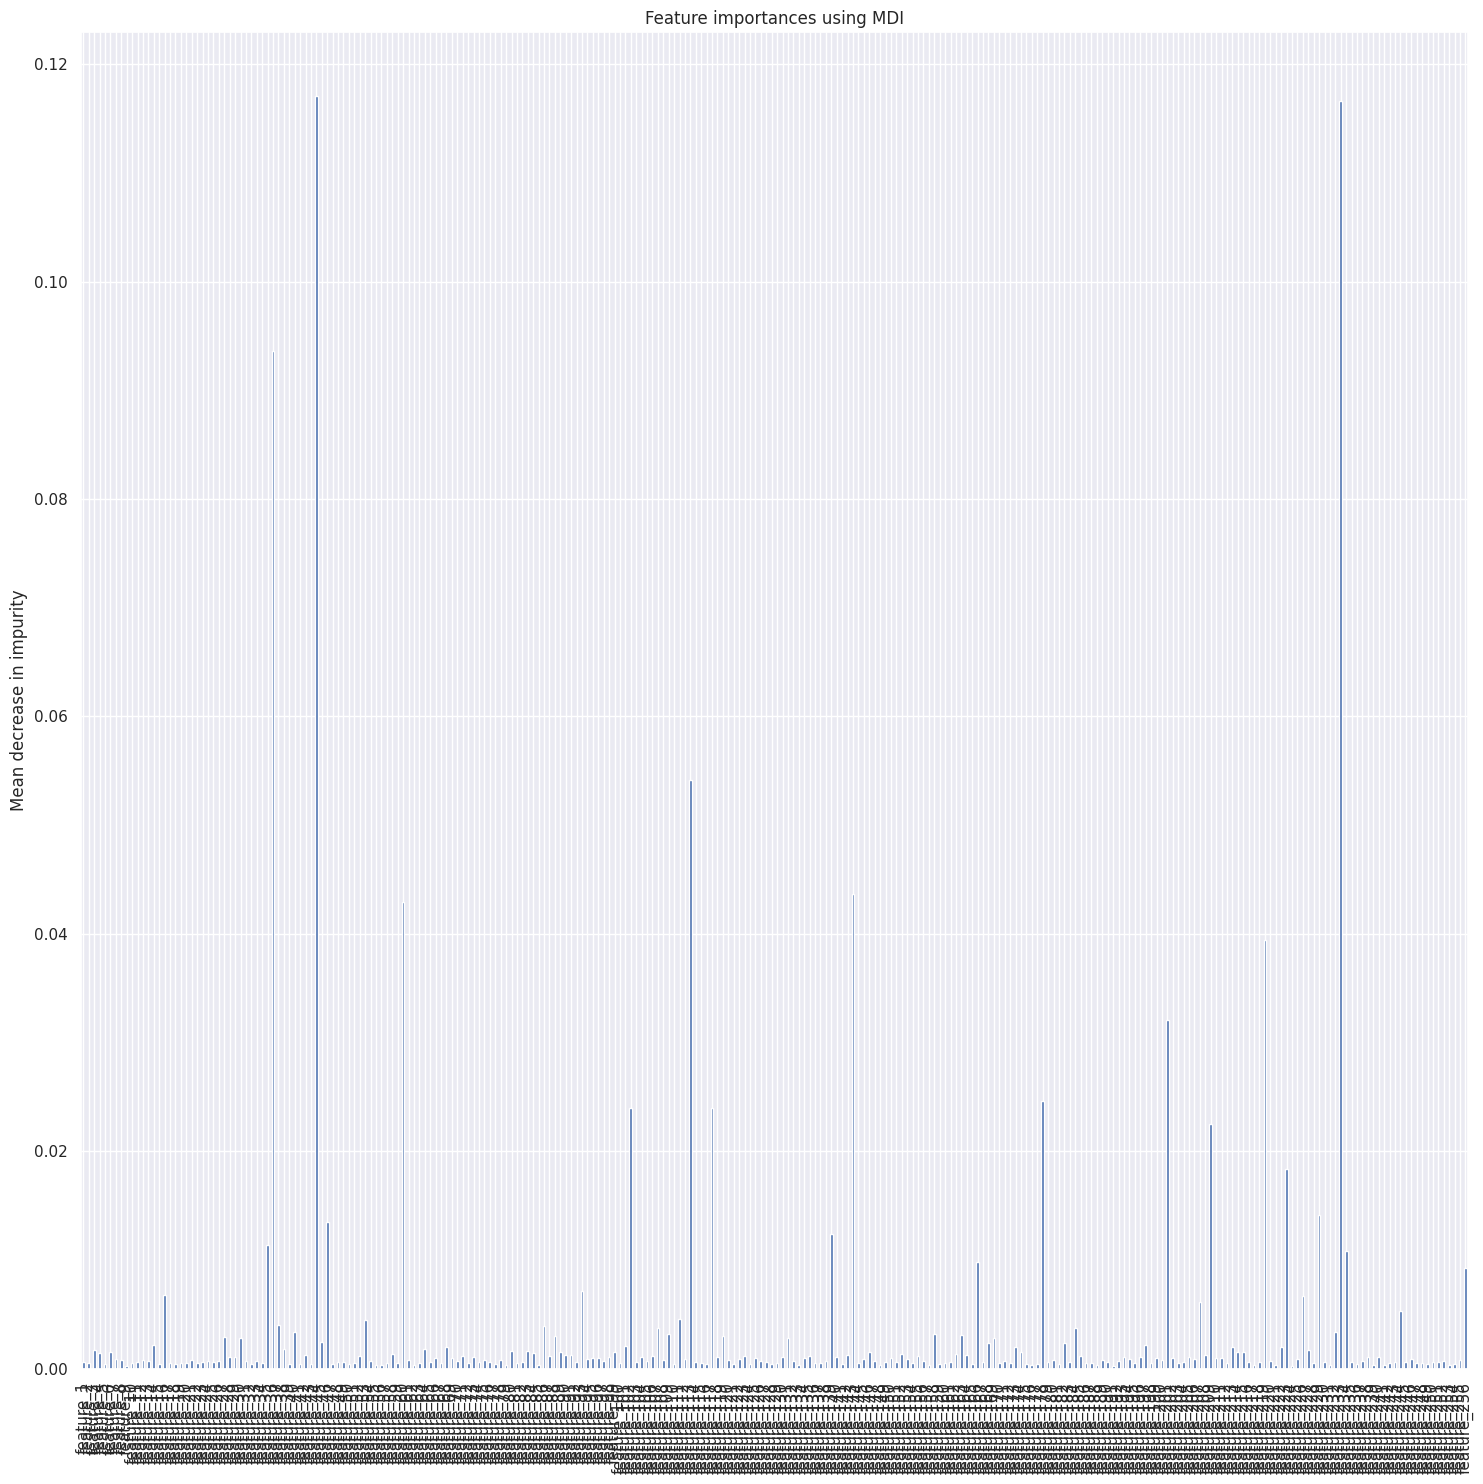

In [ ]:
file_noraml_label_3_1 = RandomForest(False,df_clean,X,Y_3,Y_valid3,valid,test,Y_test_3,isDiagramNeed=True,score=0.0005)

In [ ]:
# download_csv(file_noraml_label_3_1,'190058R_Lab-1_label-3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Label_4**

number of features drop in the list out of 256: 54
F score: 0.8493333333333334


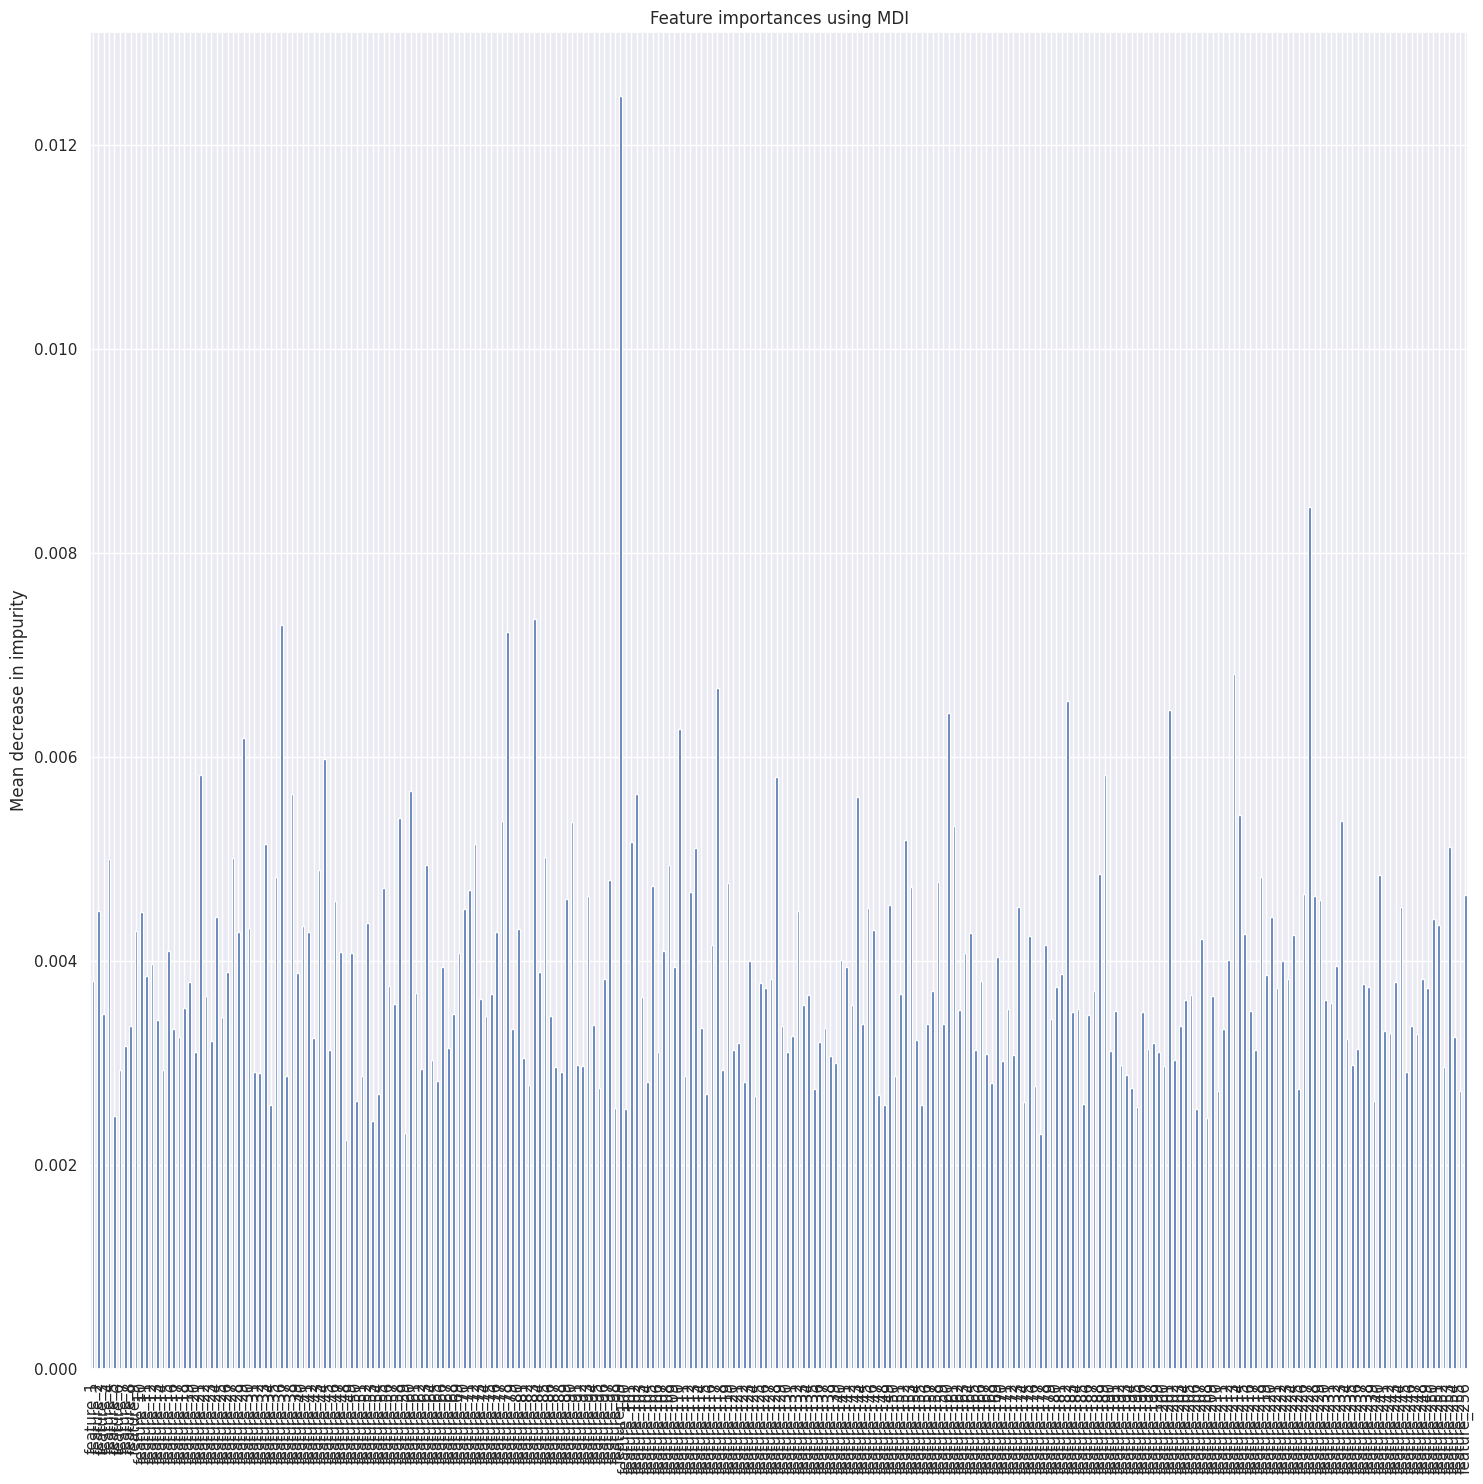

In [ ]:
file_noraml_label_4_1=RandomForest(False,df_clean,X,Y_4,Y_valid4,valid,test,Y_test_4,isDiagramNeed=True,score=0.003)

In [ ]:
file_noraml_label_4_2 = RandomForest(False,df_clean,X,Y_4,Y_valid4,valid,test,Y_test_4,isDiagramNeed=False,score=0.0025)

number of features drop in the list out of 256: 6
F score: 0.8506666666666667


**use PCA**

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


def testPCA(isAccuracy,n_components,X,Y,Y_valid,valid,test,Y_test,isDiagramNeed=True,score=0.003,dropLableList=['label_1','label_2','label_3','label_4']):
  valid = valid.values
  X_valid=valid[:,0:256].copy()
  test = test.values
  X_test=test[:,0:256].copy()
  pca = PCA(n_components=n_components)
  X_train_pca = pca.fit_transform(X)
  # feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
  feature_names = [f"feature_{i+1}" for i in range(n_components)]
  forest = RandomForestClassifier(random_state=0)
  forest.fit(X_train_pca, Y)
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
  forest_importances = pd.Series(importances, index=feature_names)
  if(isDiagramNeed):
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
  label_feature_drop_list=[]
  # # print(np.min(forest_importances.values()))
  for key,value  in forest_importances.items():
    if(value<score):
      label_feature_drop_list.append(key)
  label_x_test=label_feature_drop_list.copy()
  # label_x_test.extend(dropLableList)
  print("number of features drop in the list out of ",n_components, ":",len(label_feature_drop_list))

  X_train=pd.DataFrame(X_train_pca,columns=feature_names)
  X_train = X_train.drop(columns=label_x_test)

  X_valid_pca = pca.transform(X_valid)
  X_valid = pd.DataFrame(X_valid_pca,columns=feature_names)
  X_valid = X_valid.drop(columns=label_x_test)

  X_test_pca = pca.transform(X_test)
  X_test = pd.DataFrame(X_test_pca,columns=feature_names)
  X_test = X_test.drop(columns=label_x_test)
   # Standardize the features
  X_train_scaled , X_valid_scaled , X_test_scaled = scaling(X_train,X_valid,X_test)

  # Train a random forest classifier
  clf = RandomForestClassifier(random_state=42)
  clf.fit(X_train_scaled, Y)

  # Make predictions on the test data set
  Y_test_pred = clf.predict(X_test_scaled)
  # Make predictions on the valid data set
  Y_valid_pred = clf.predict(X_valid_scaled)
  outputDict ={}
  outputDict['Predicted labels before feature engineering']= Y_test
  outputDict['Predicted labels after feature engineering']= Y_test_pred
  outputDict['No of new features']=['' for j in range(X_test_scaled.shape[0])]
  for i in  range(0,256) :
    col_name="new_feature_"+str(i+1)
    if(i<X_test_scaled.shape[1]):
      outputDict[col_name] = X_test_scaled[:,i]
    else:
      outputDict[col_name]=[0 for j in range(X_test_scaled.shape[0])]
  if(isAccuracy):
    # Calculate accuracy
    accuracy = accuracy_score(Y_valid, Y_valid_pred)
    print("Accuracy:", accuracy)
  else:
    # Calculate F score
    accuracy = f1_score(Y_valid, Y_valid_pred,average='micro')
    print("F score:", accuracy)
  df = pd.DataFrame(outputDict)
  df['No of new features'] = X_test_scaled.shape[1]
  return df

**Label-1**

number of features drop in the list out of  150 : 0
Accuracy: 0.9613333333333334


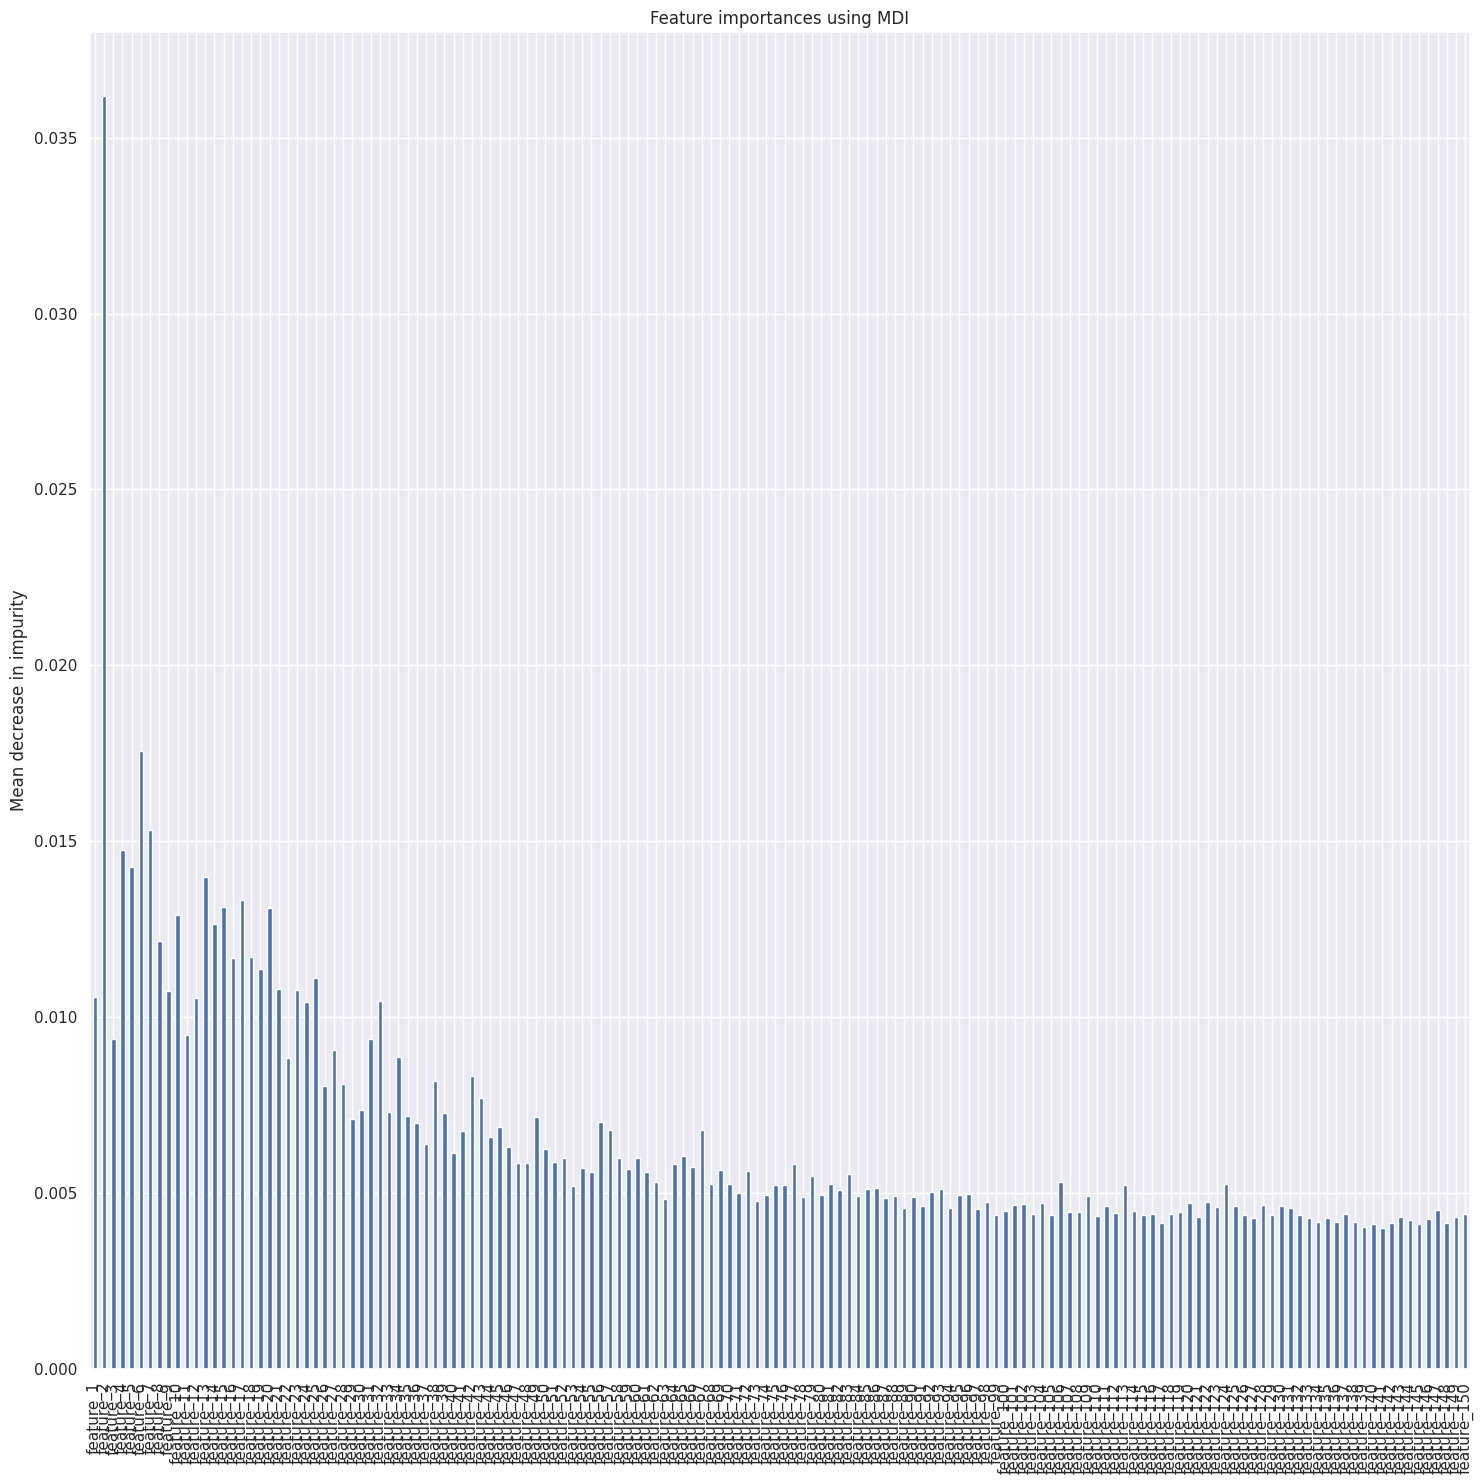

In [ ]:
file_pca_label_1_1=testPCA(True,150,X,Y_1,Y_valid1,valid,test,Y_test_1,True,0.0025)

In [ ]:
# download_csv(file_pca_label_1_1,'190058R_Lab-1_label-1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_pca_label_1_2 = testPCA(True,150,X,Y_1,Y_valid1,valid,test,Y_test_1,False,0.01)

number of features drop in the list out of  150 : 127
Accuracy: 0.916


number of features drop in the list out of  100 : 66
Accuracy: 0.9453333333333334


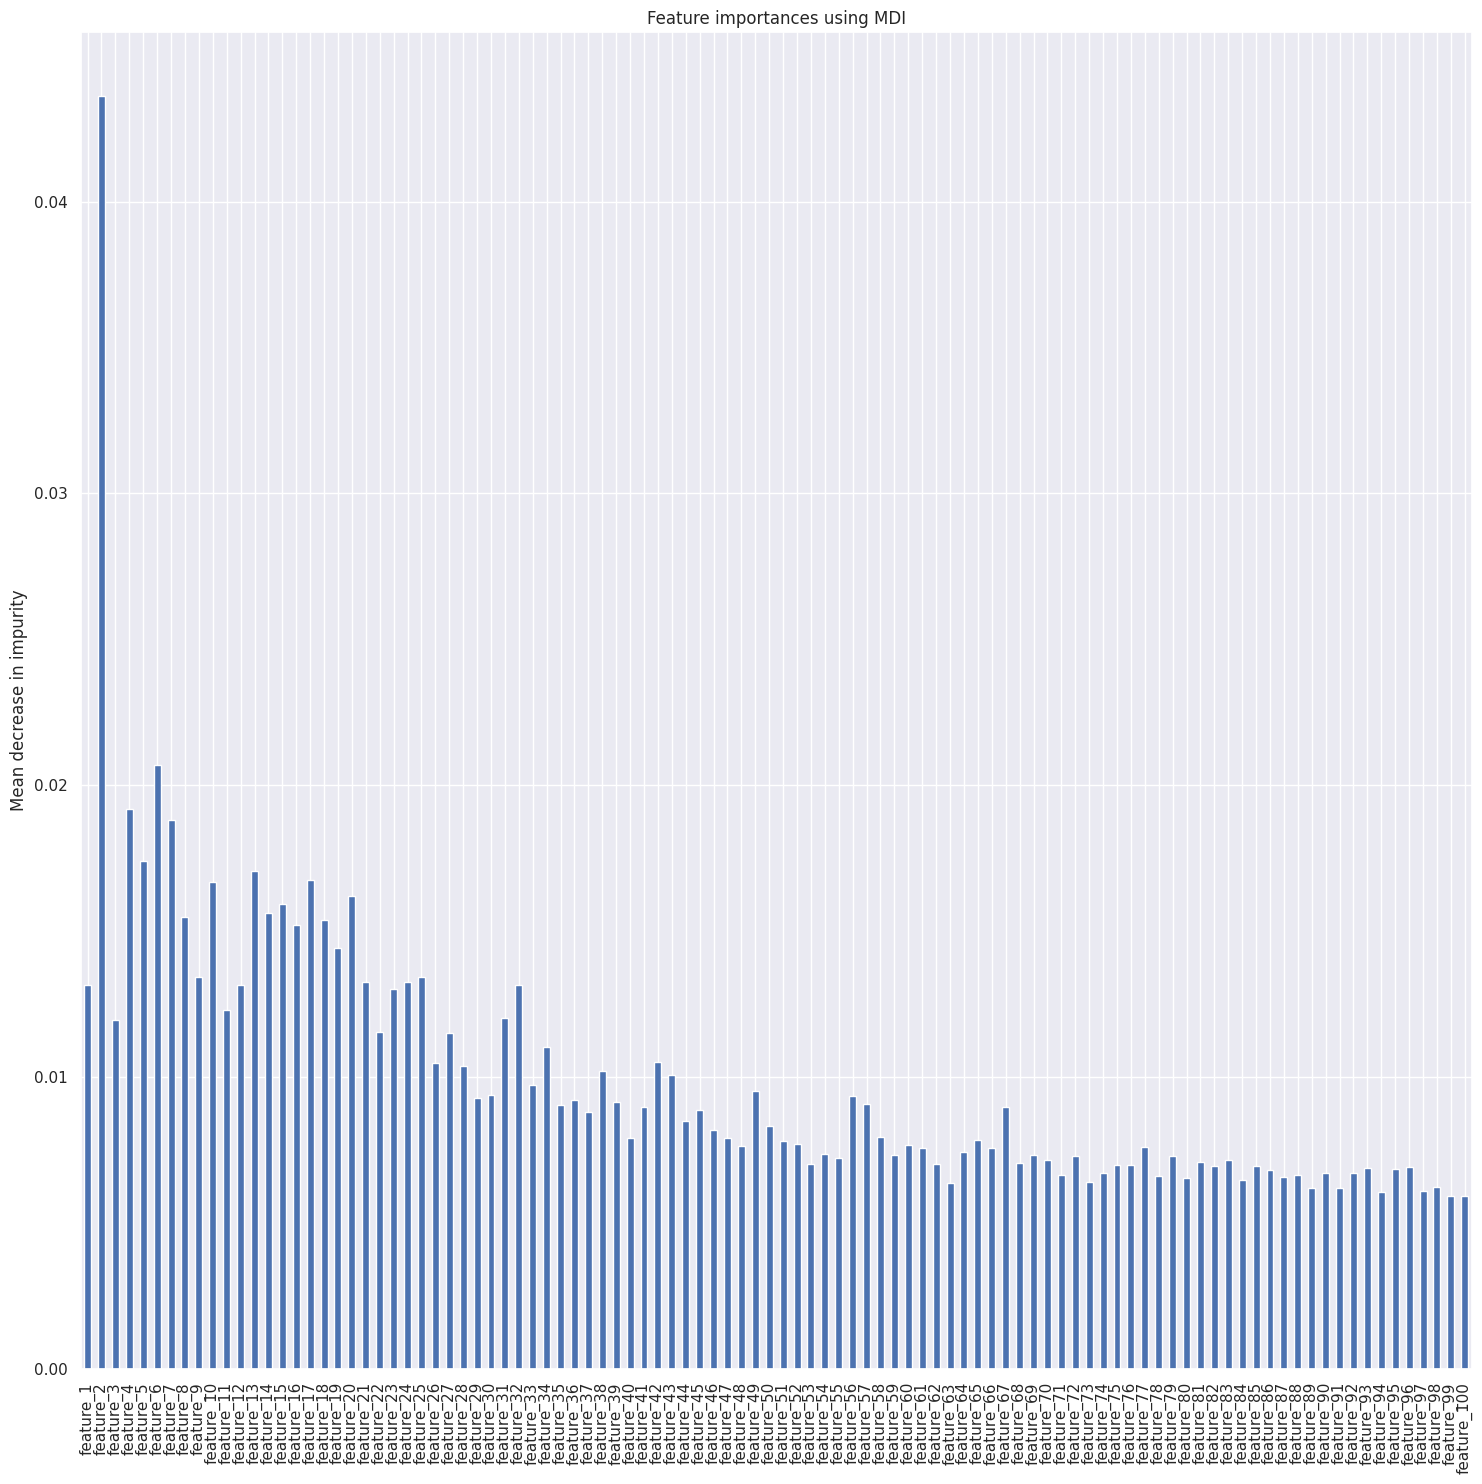

In [ ]:
file_pca_label_1_3 = testPCA(True,100,X,Y_1,Y_valid1,valid,test,Y_test_1,True,0.01)

number of features drop in the list out of  50 : 27
Accuracy: 0.9133333333333333


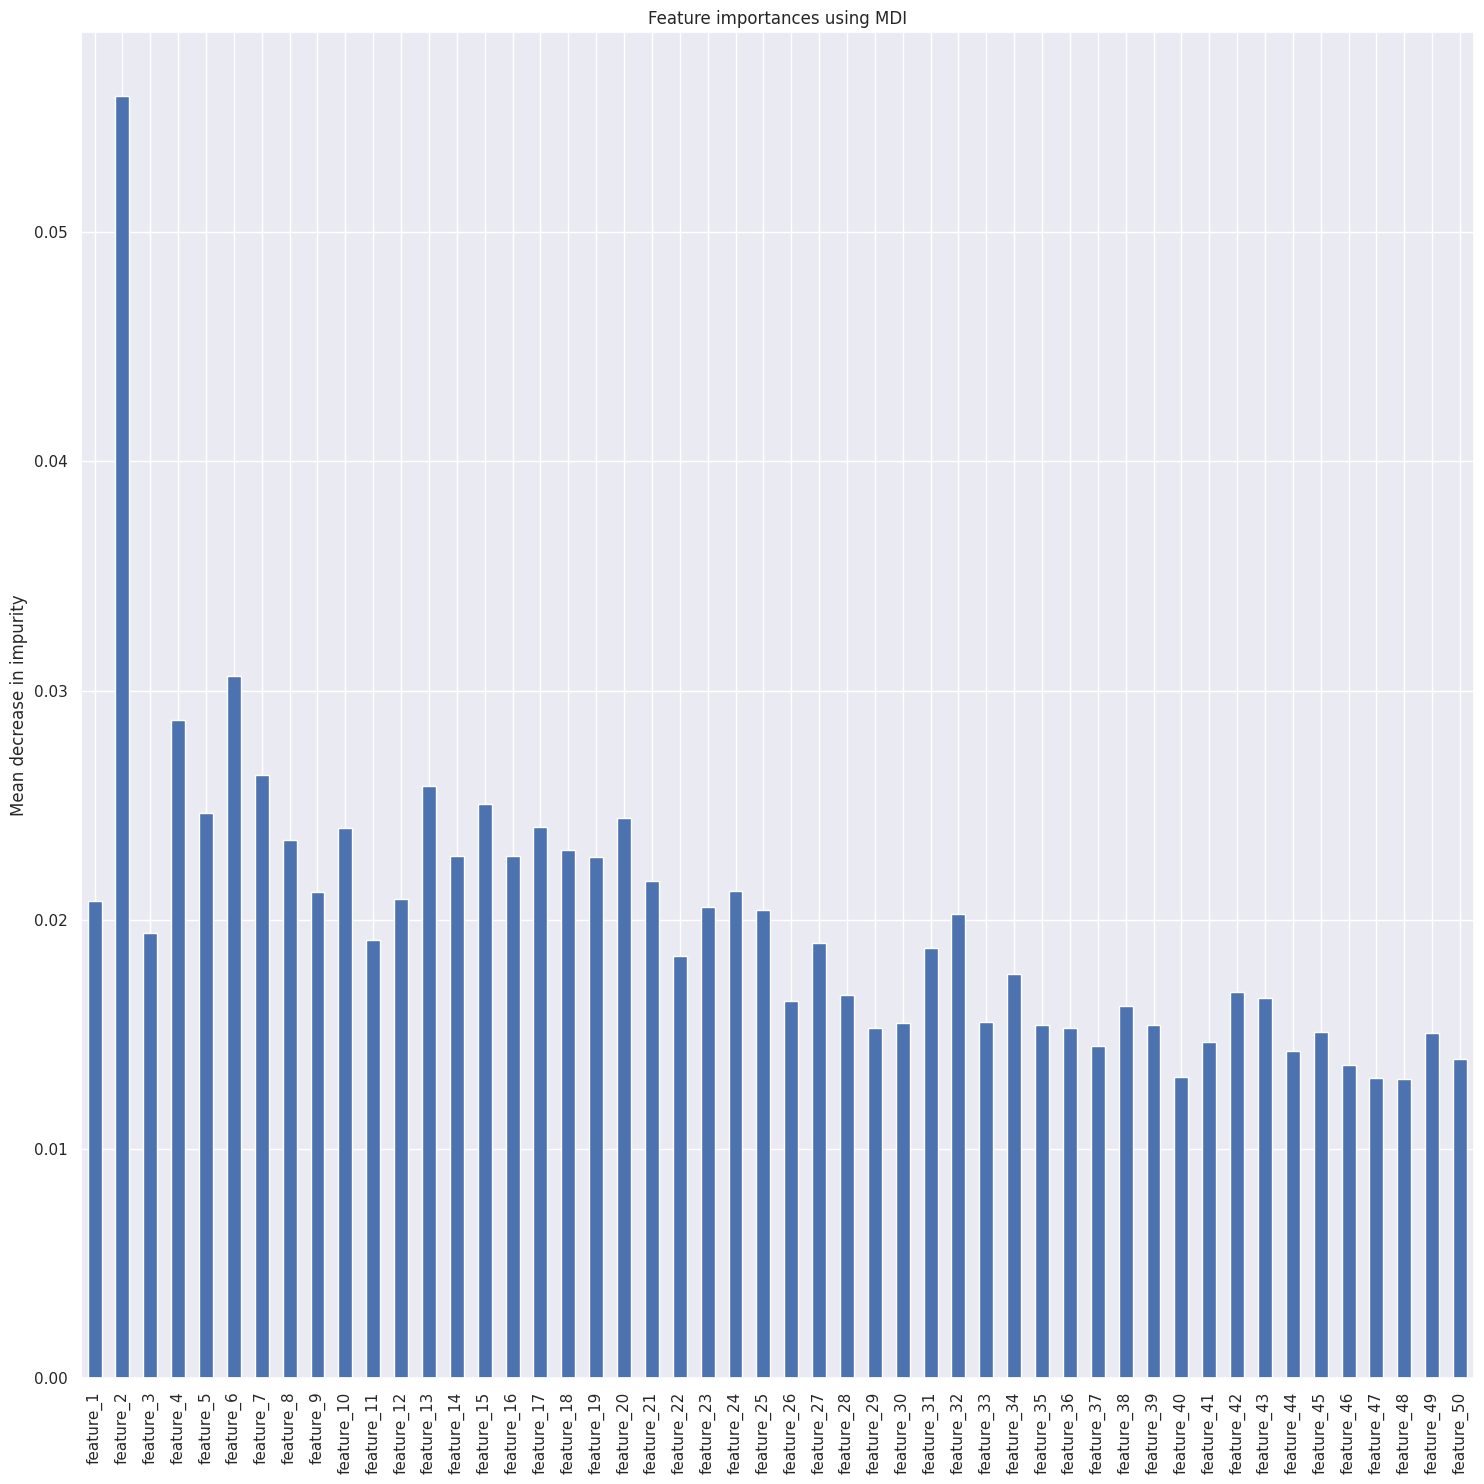

In [ ]:
file_pca_label_1_4 = testPCA(True,50,X,Y_1,Y_valid1,valid,test,Y_test_1,True,0.02)

number of features drop in the list out of  200 : 0
Accuracy: 0.9586666666666667


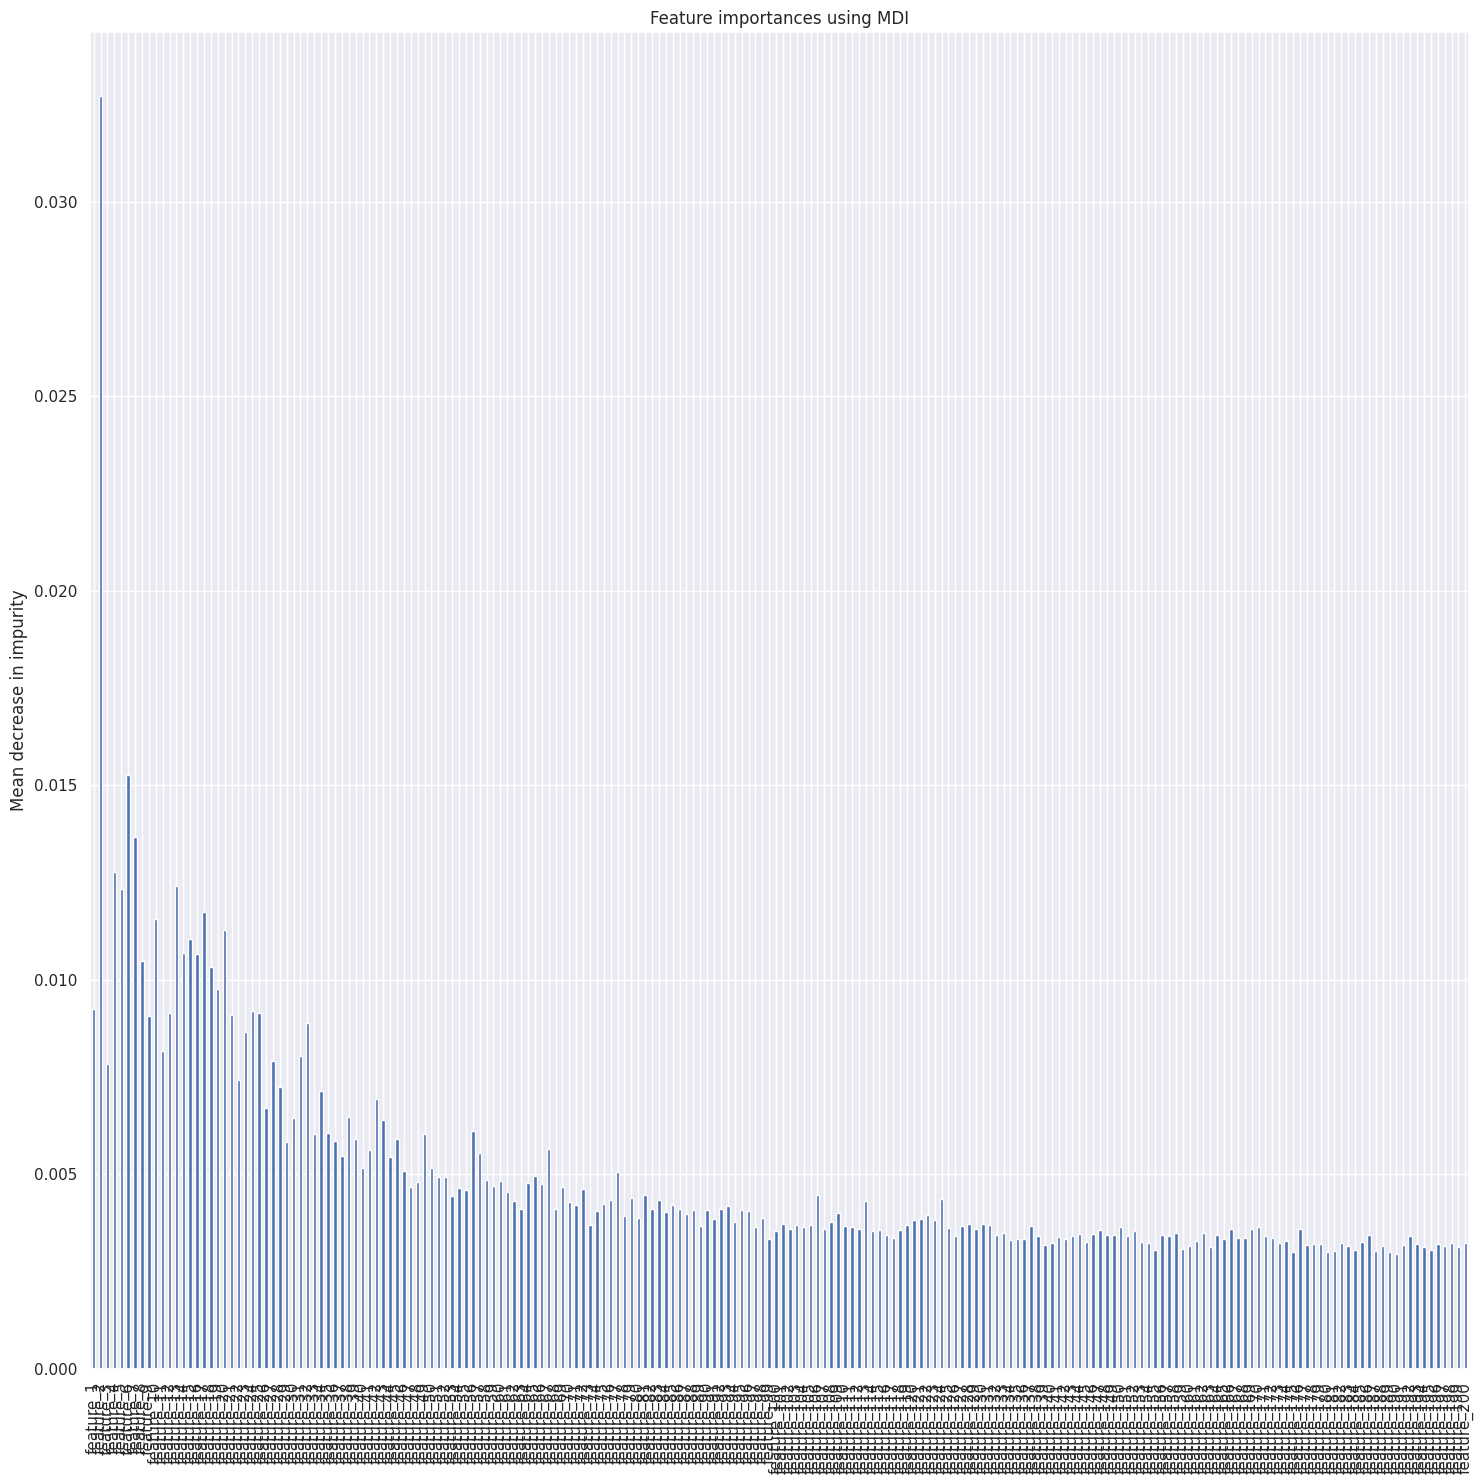

In [ ]:
file_pca_label_1_5 = testPCA(True,200,X,Y_1,Y_valid1,valid,test,Y_test_1,True,0.002)

number of features drop in the list out of  220 : 0
Accuracy: 0.964


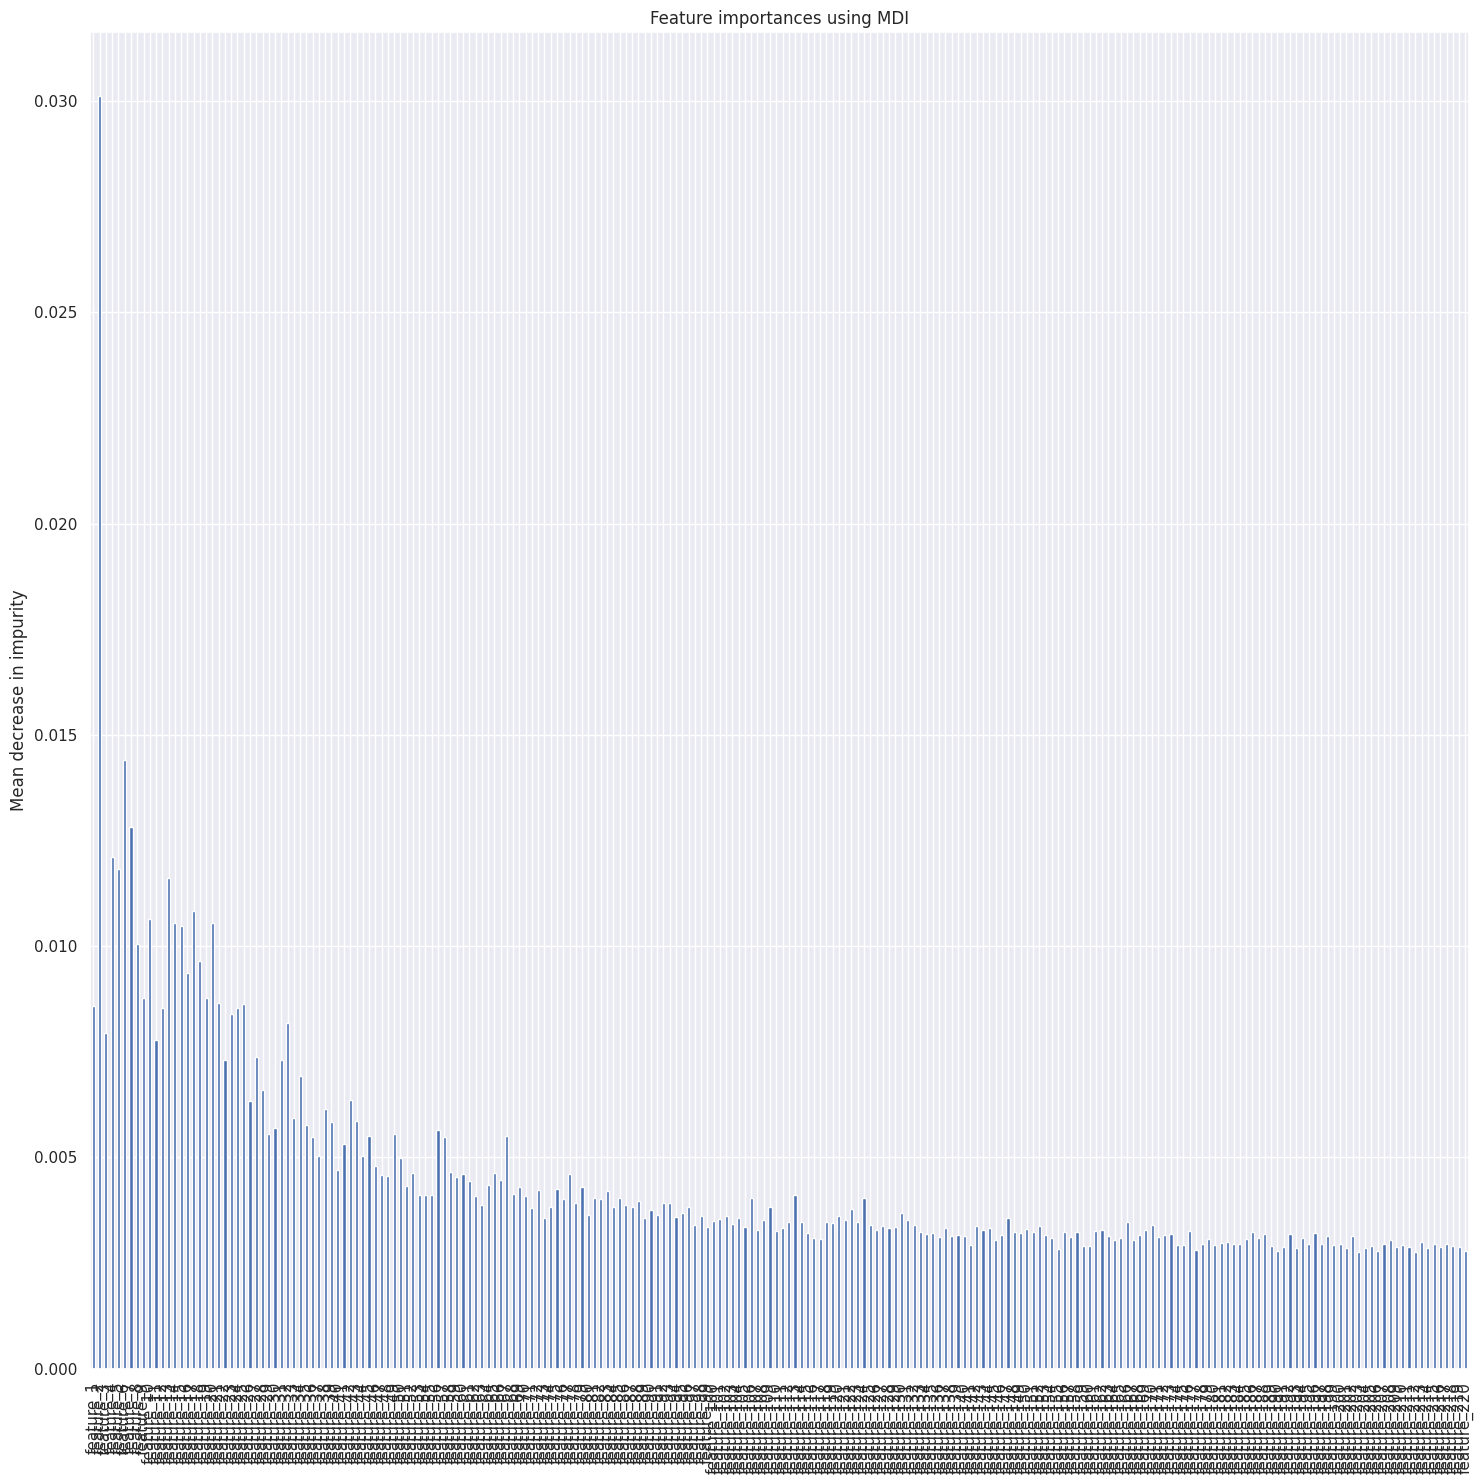

In [ ]:
file_pca_label_1_6 = testPCA(True,220,X,Y_1,Y_valid1,valid,test,Y_test_1,True,0.002)

In [ ]:
file_pca_label_1_7 = testPCA(True,220,X,Y_1,Y_valid1,valid,test,Y_test_1,False,0.0045)

number of features drop in the list out of  220 : 161
Accuracy: 0.9613333333333334


**Label-2**

number of features drop in the list out of  150 : 51
F score: 0.904891304347826


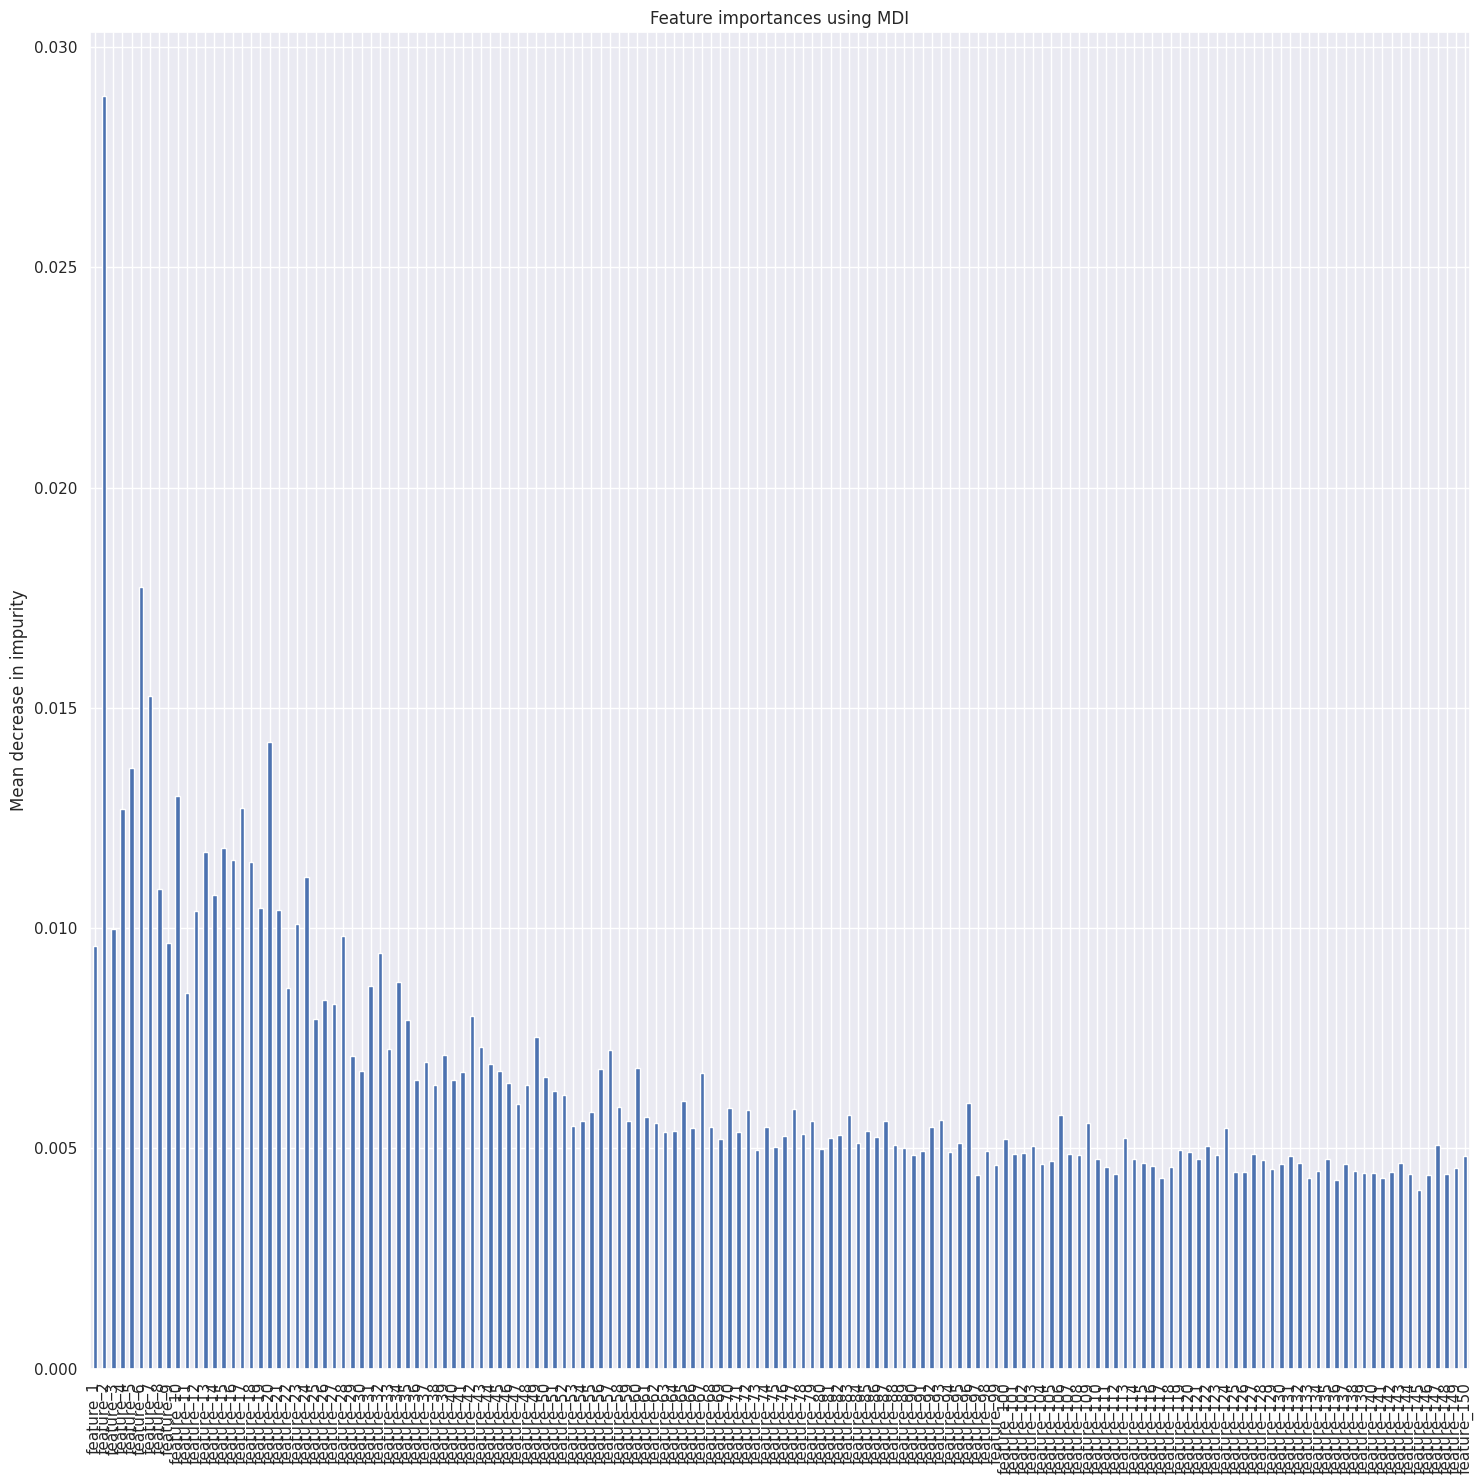

In [ ]:
file_pca_label_2_1 = testPCA(False,150,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,True,0.005)

number of features drop in the list out of  50 : 8
F score: 0.9144021739130435


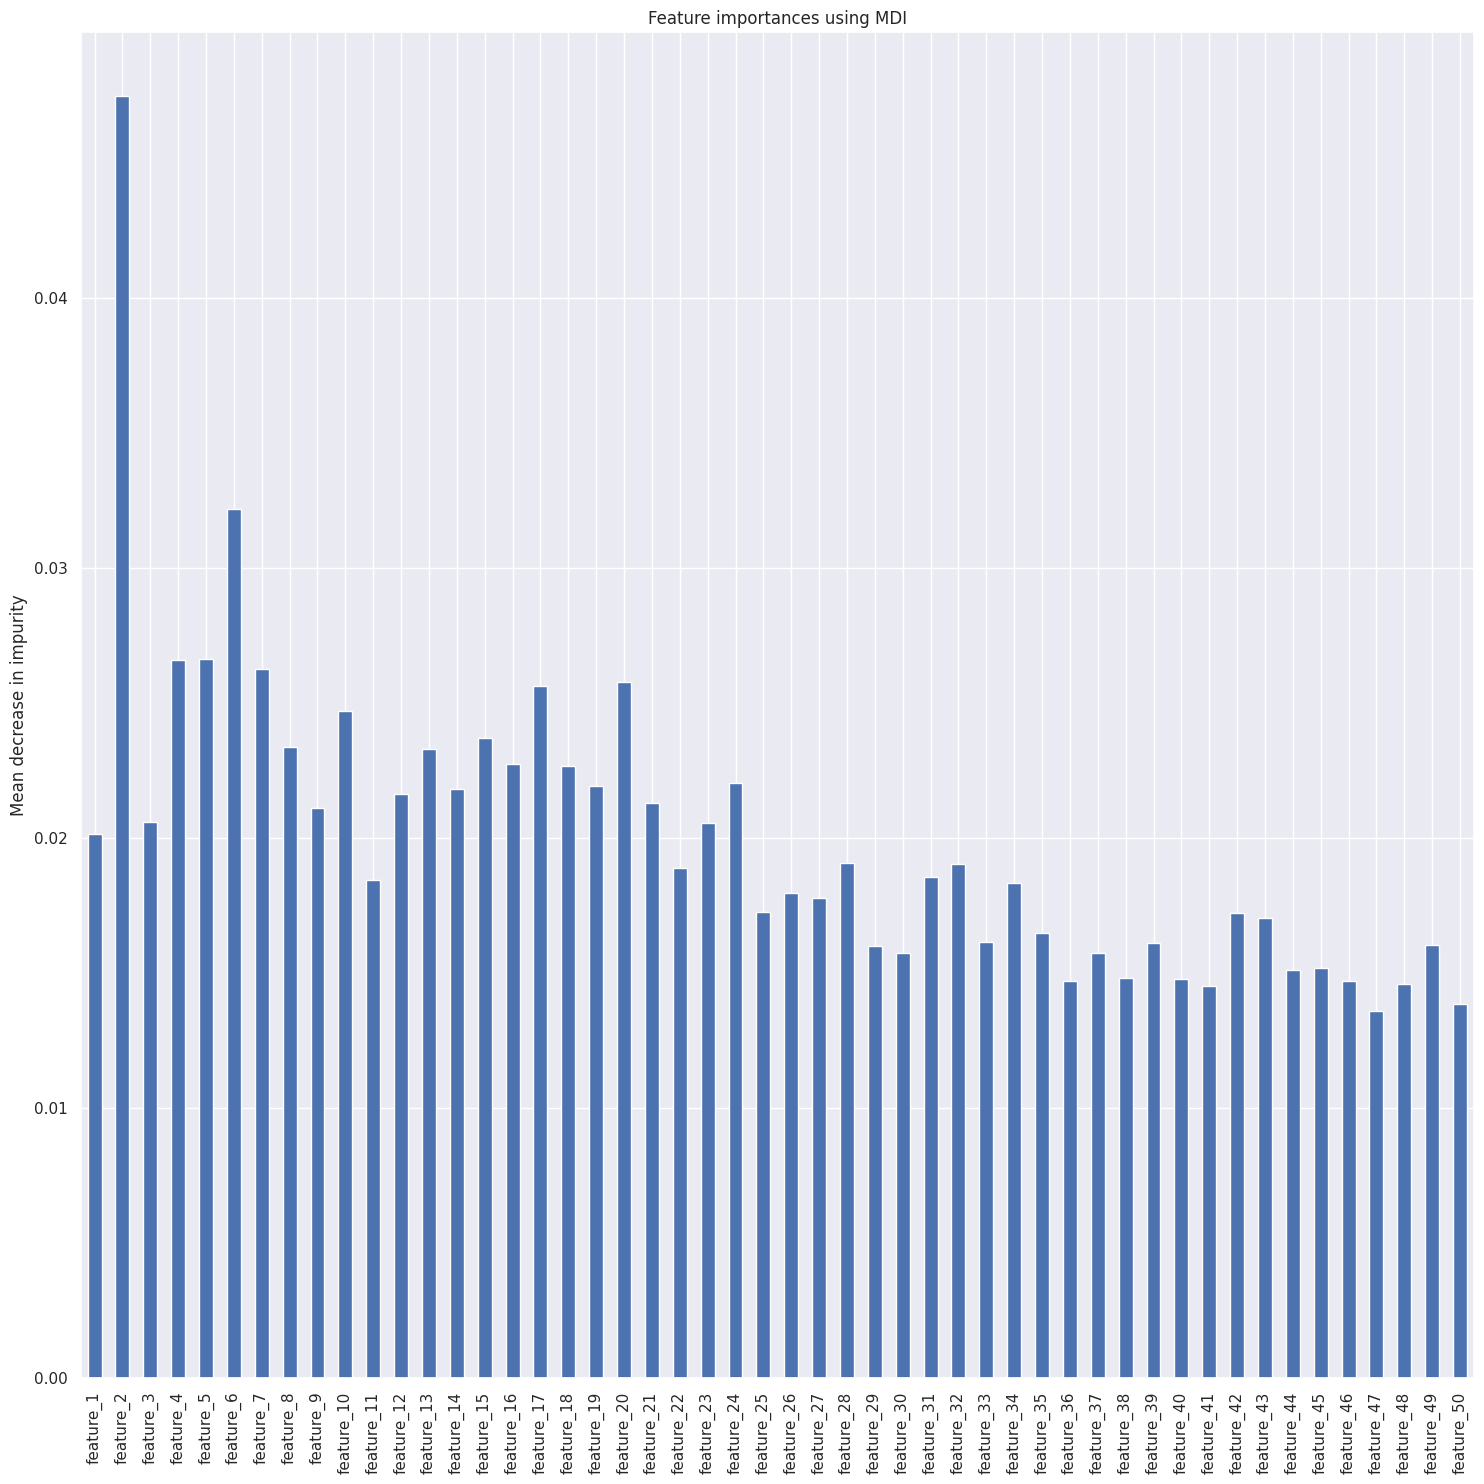

In [ ]:
file_pca_label_2_2=testPCA(False,50,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,True,0.015)

number of features drop in the list out of  100 : 14
F score: 0.904891304347826


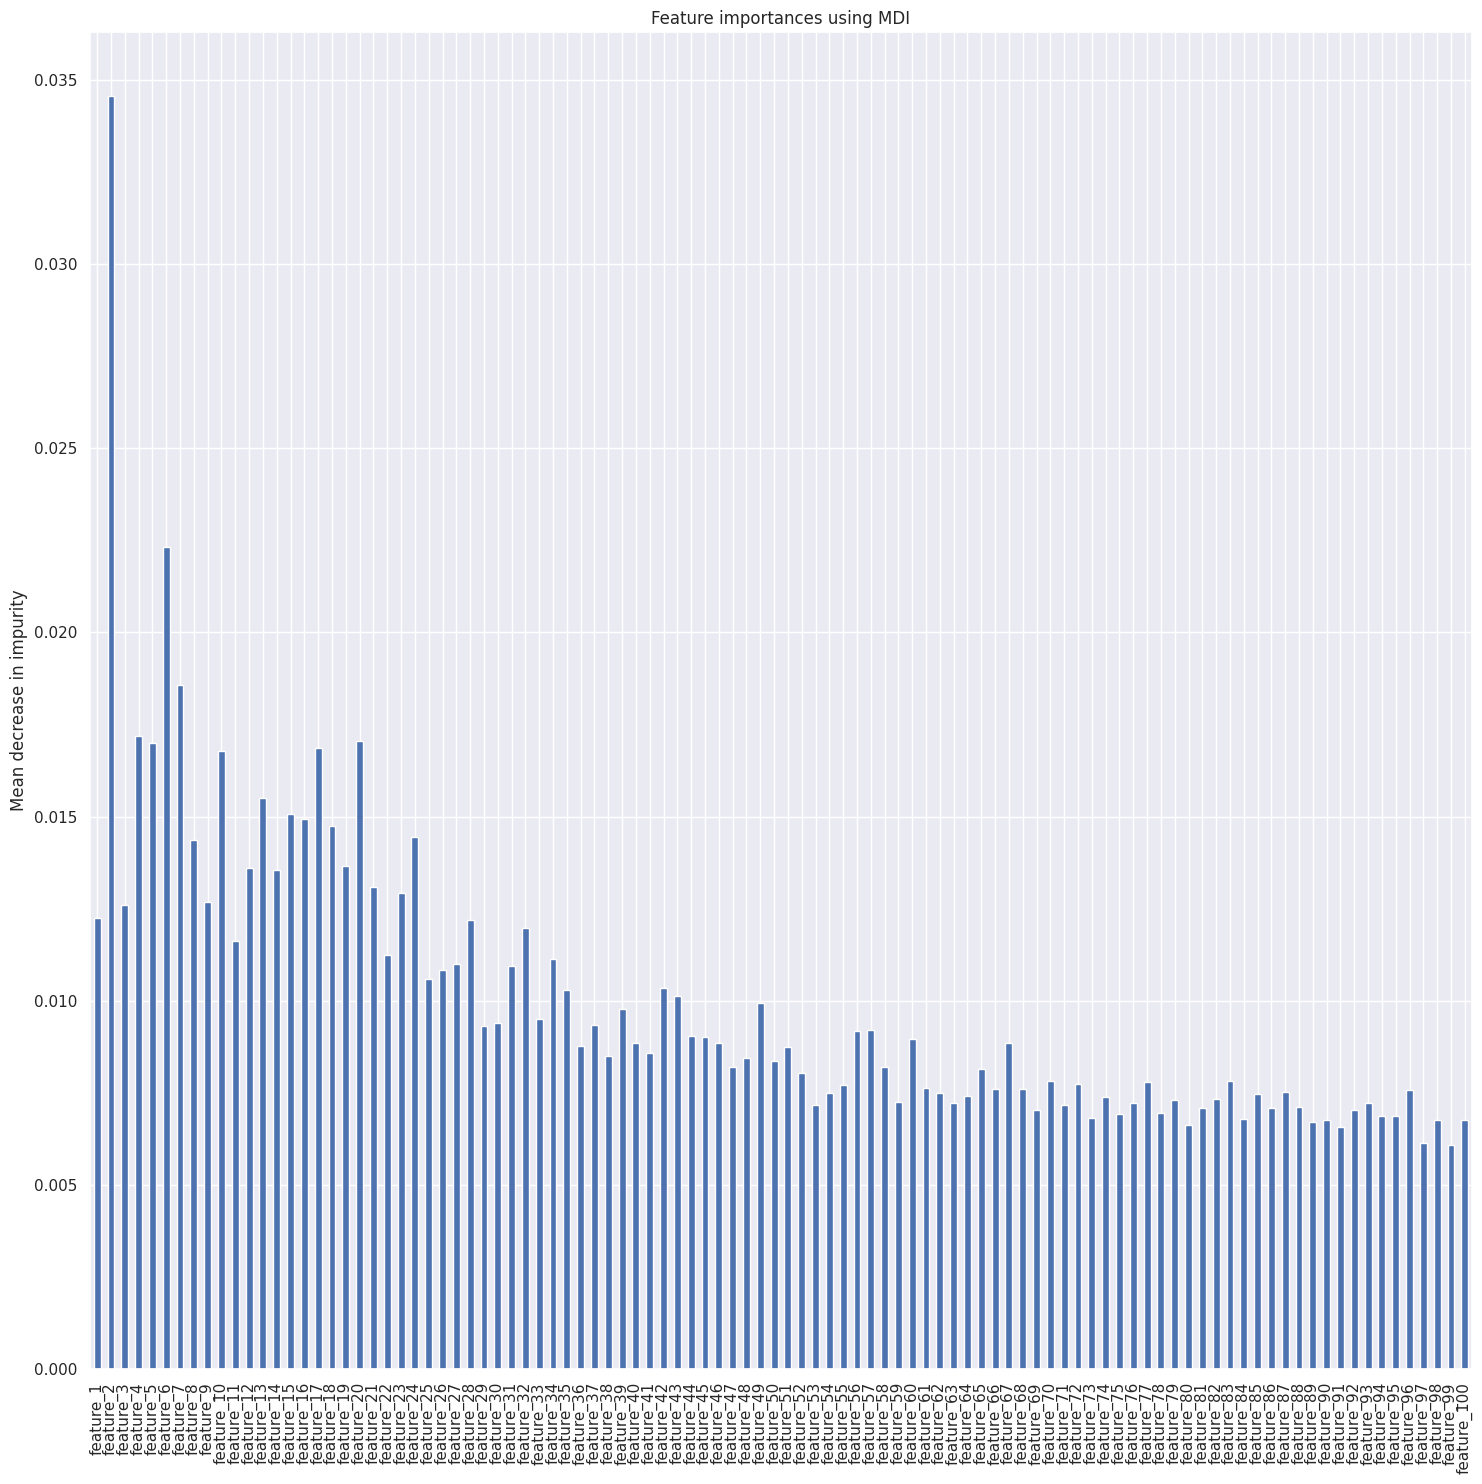

In [ ]:
file_pca_label_2_3 = testPCA(False,100,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,True,0.007)

number of features drop in the list out of  60 : 0
F score: 0.9198369565217391


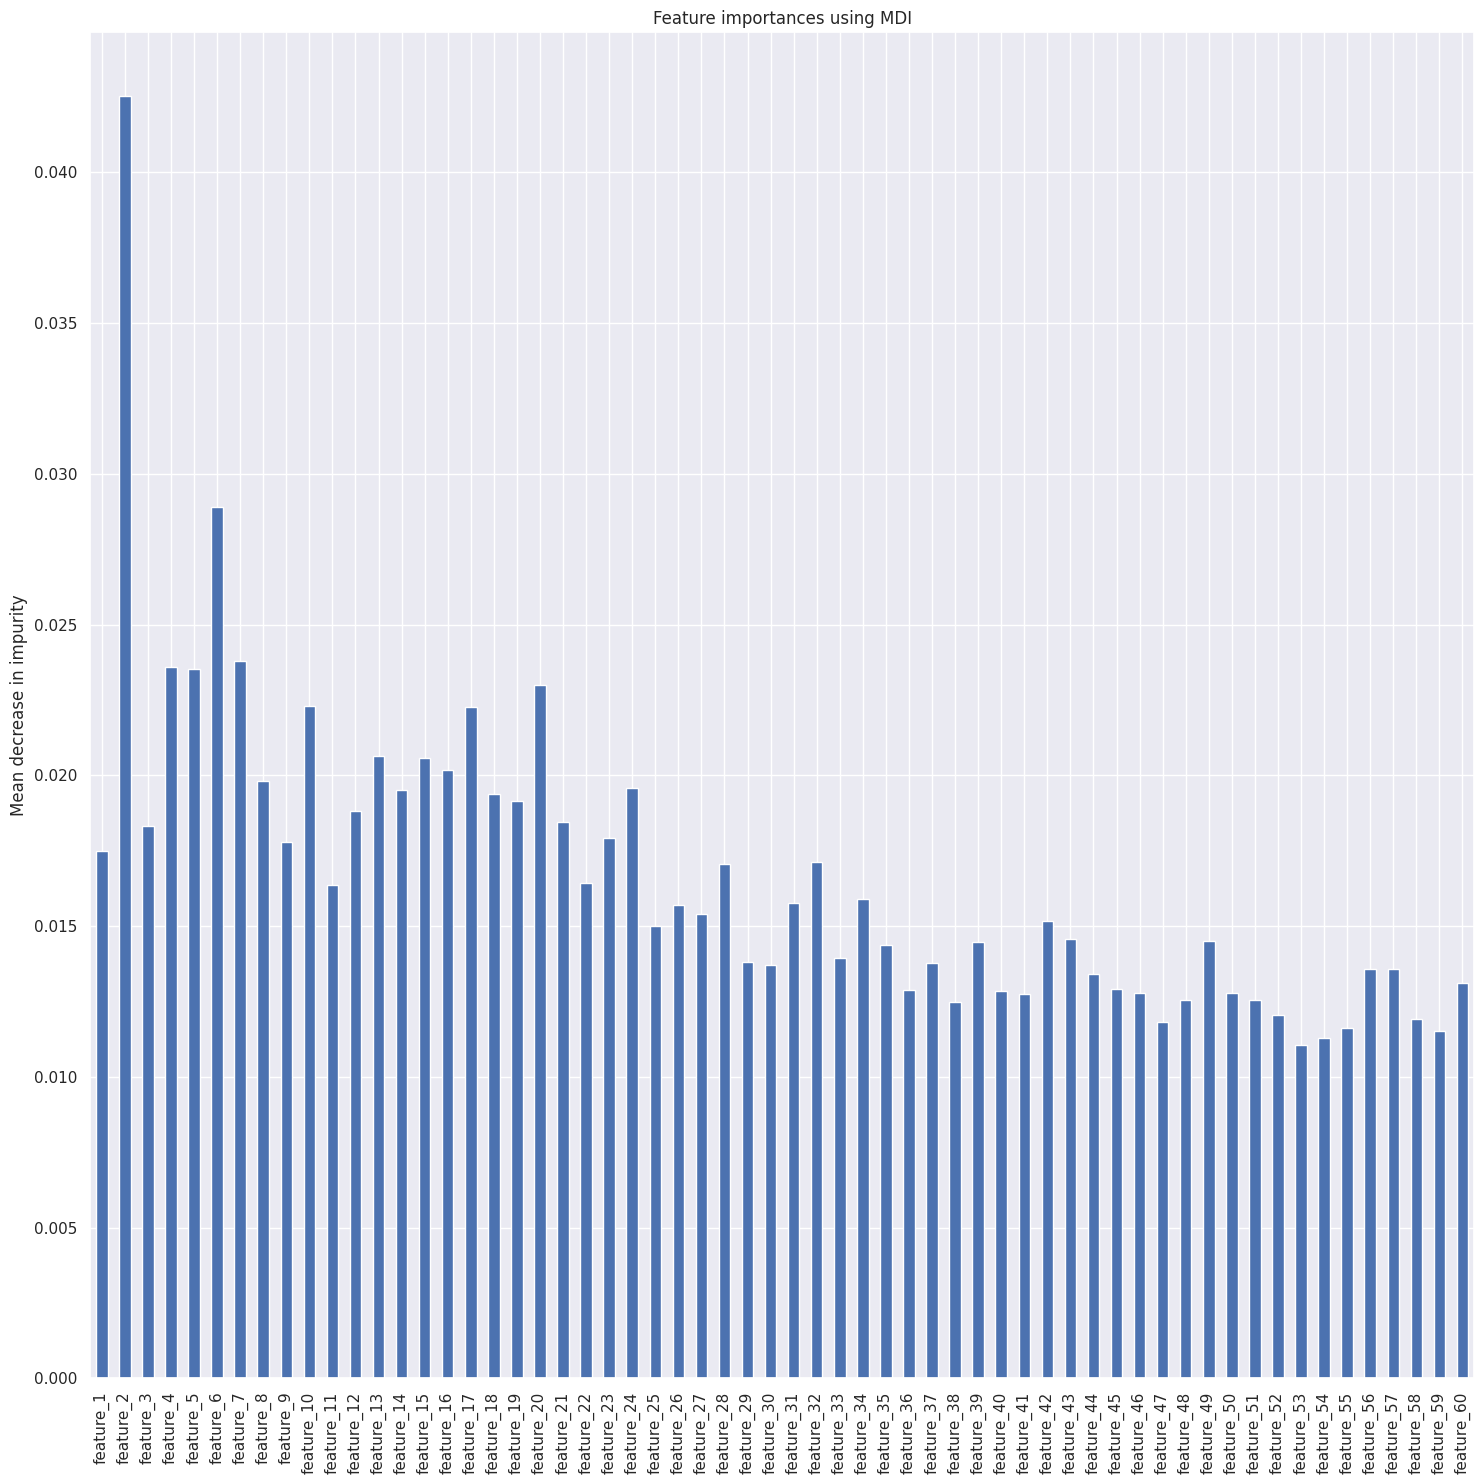

In [ ]:
file_pca_label_2_4 = testPCA(False,60,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,True,0)

number of features drop in the list out of  60 : 29
F score: 0.9008152173913043


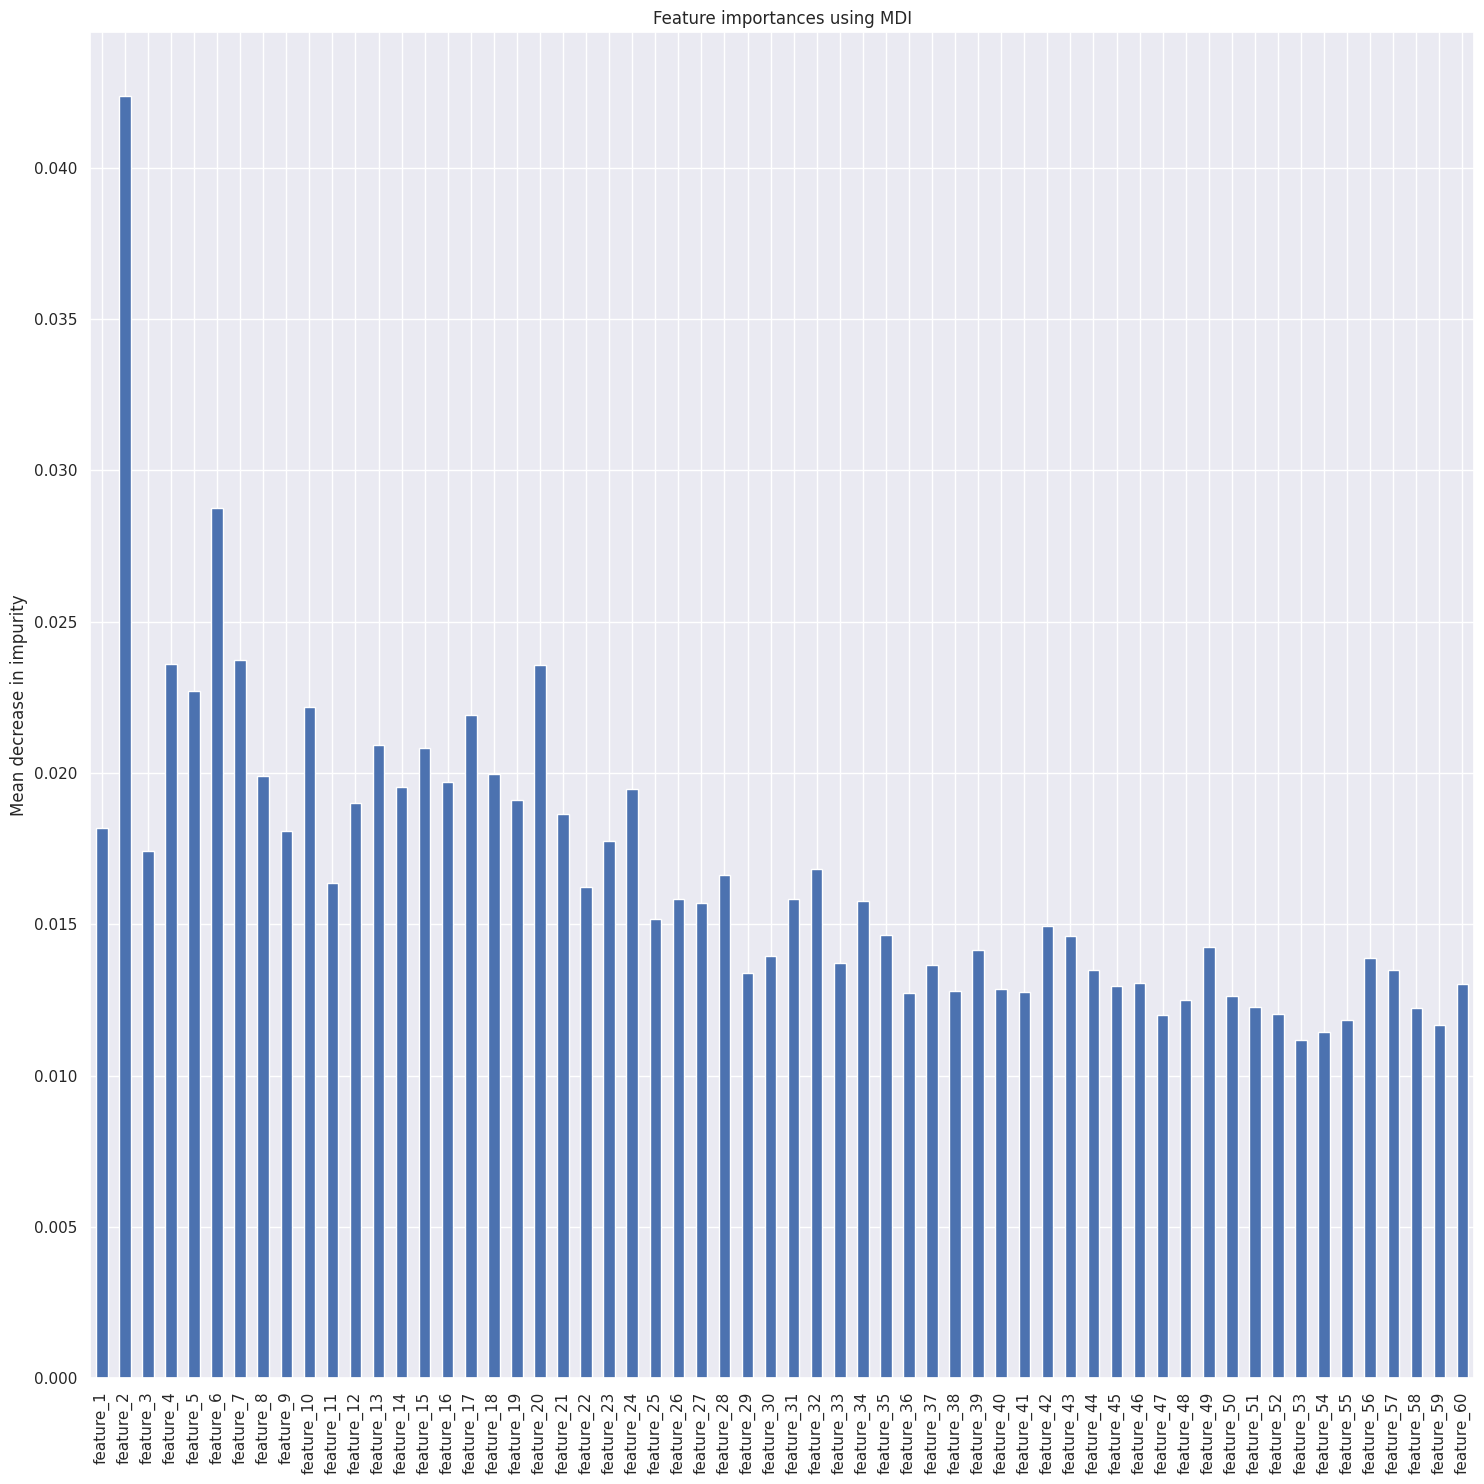

In [ ]:
file_pca_label_2_5 = testPCA(False,60,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,True,0.015)

number of features drop in the list out of  30 : 0
F score: 0.9035326086956522


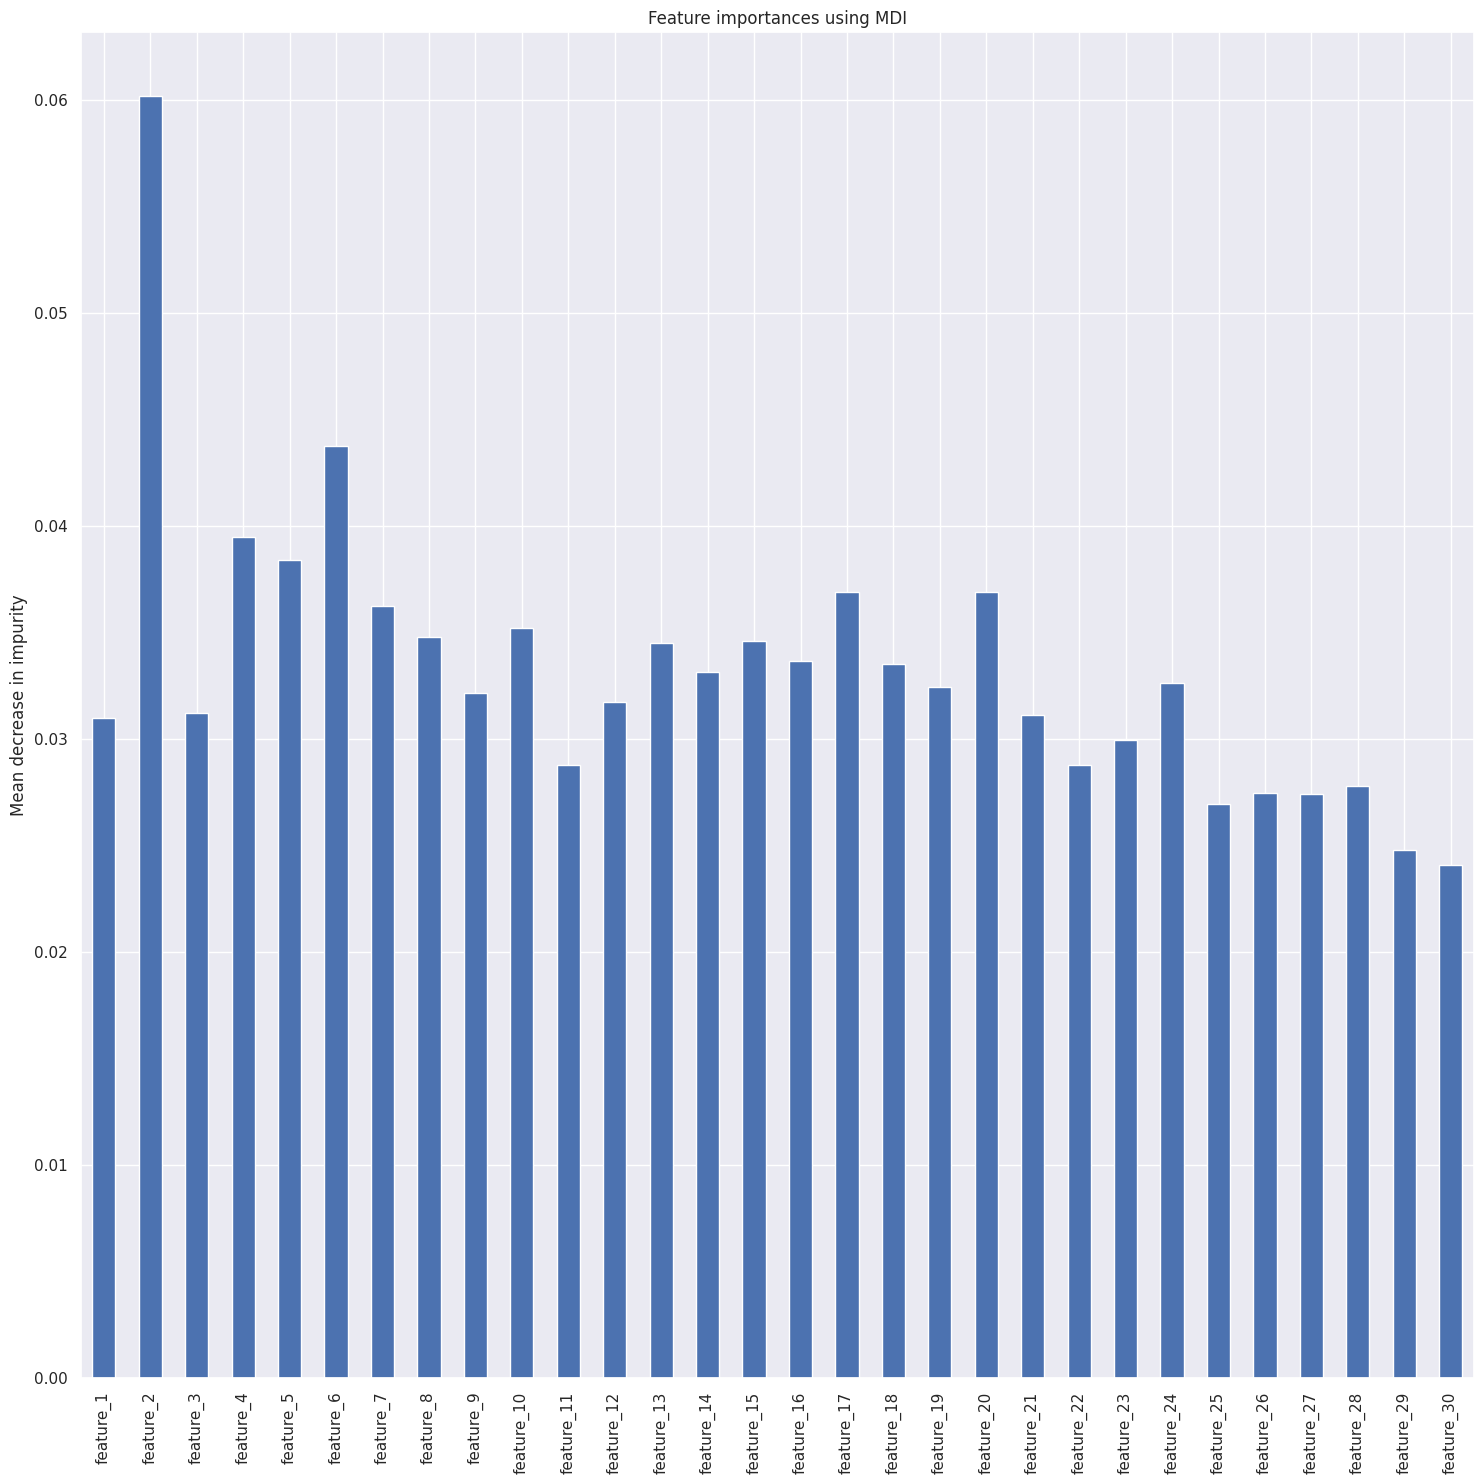

In [ ]:
file_pca_label_2_6 = testPCA(False,30,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,True,0)

**Label-3**

number of features drop in the list out of  150 : 101
F score: 0.9933333333333333


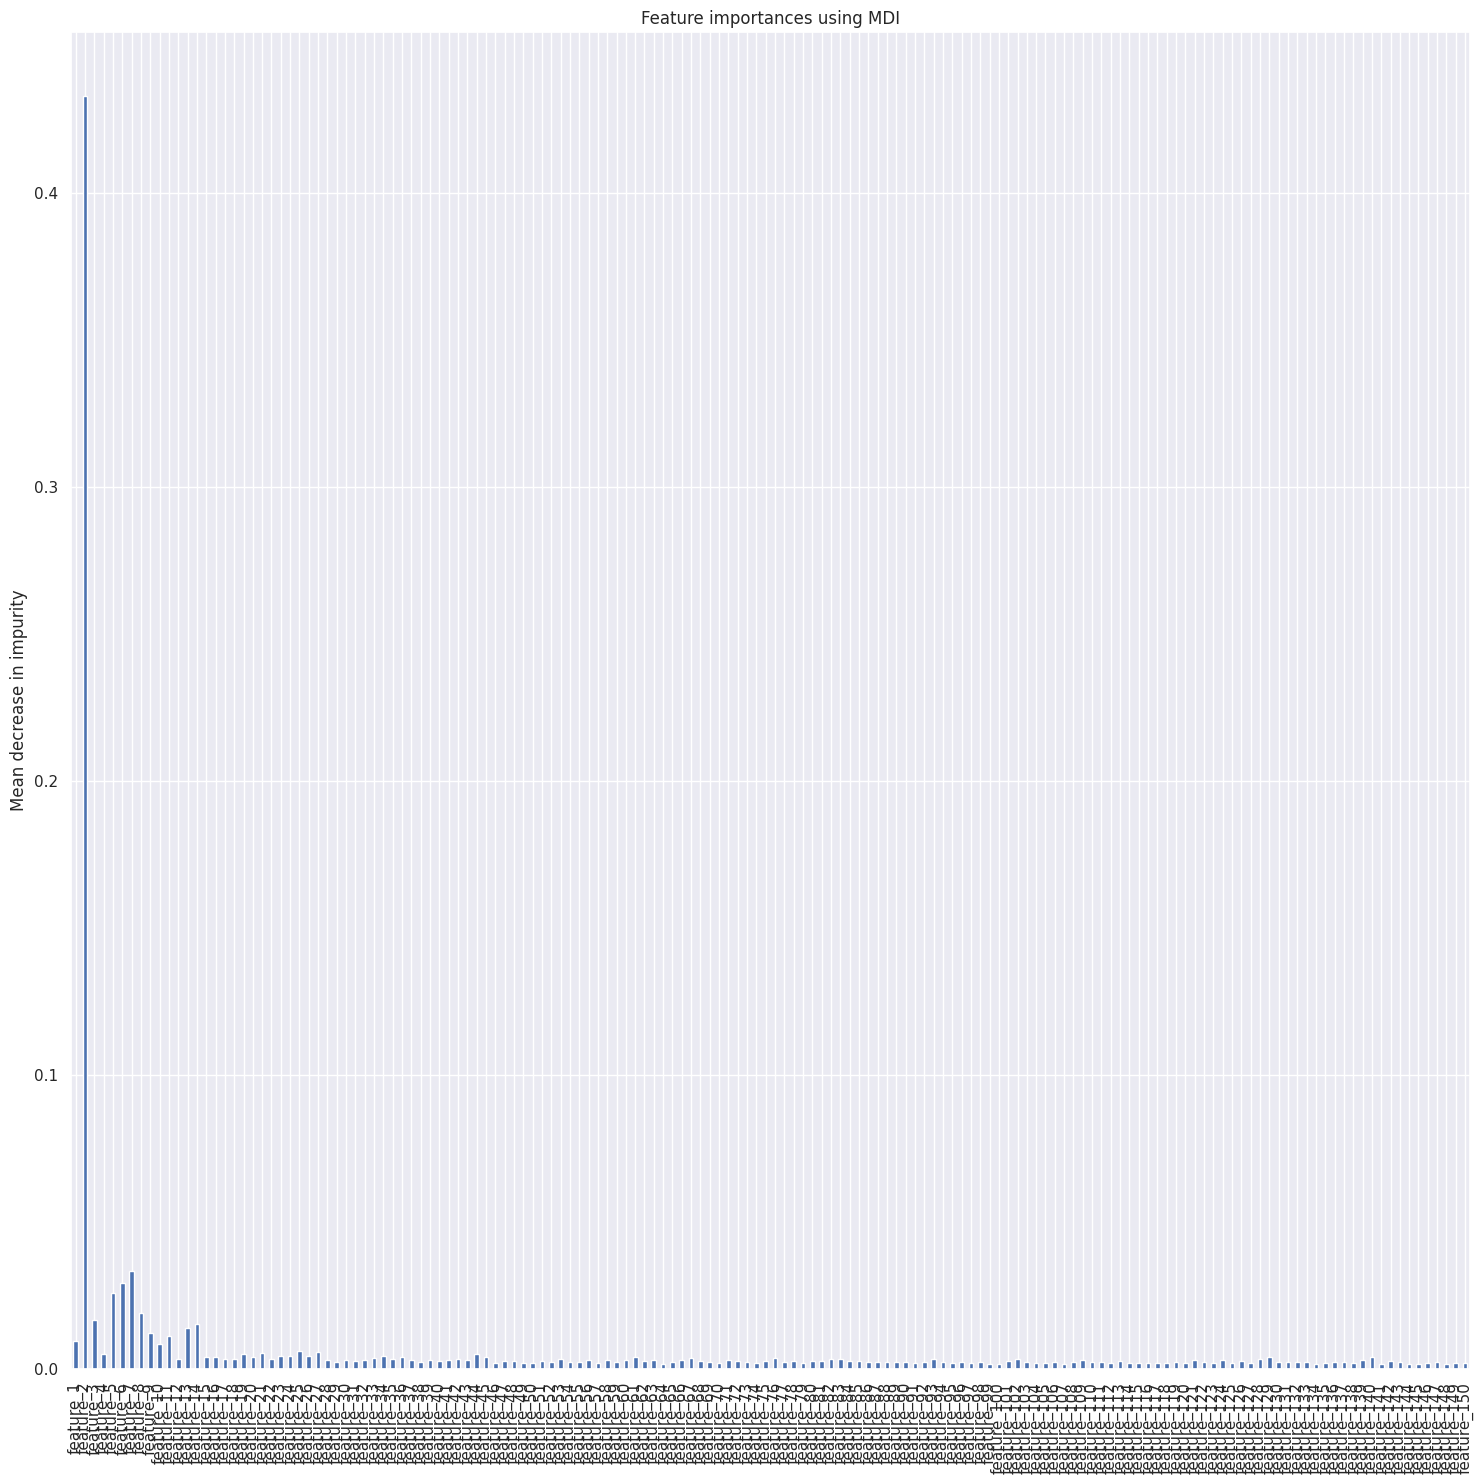

In [ ]:
file_pca_label_3_1 = testPCA(False,150,X,Y_3,Y_valid3,valid,test,Y_test_3,True,0.003)

In [ ]:
file_pca_label_3_2 = testPCA(False,150,X,Y_3,Y_valid3,valid,test,Y_test_3,False,0.002)

number of features drop in the list out of  150 : 44
F score: 0.996


In [ ]:
download_csv(file_pca_label_3_2,'190058R_Lab-1_label-3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

number of features drop in the list out of  200 : 95
F score: 0.9946666666666667


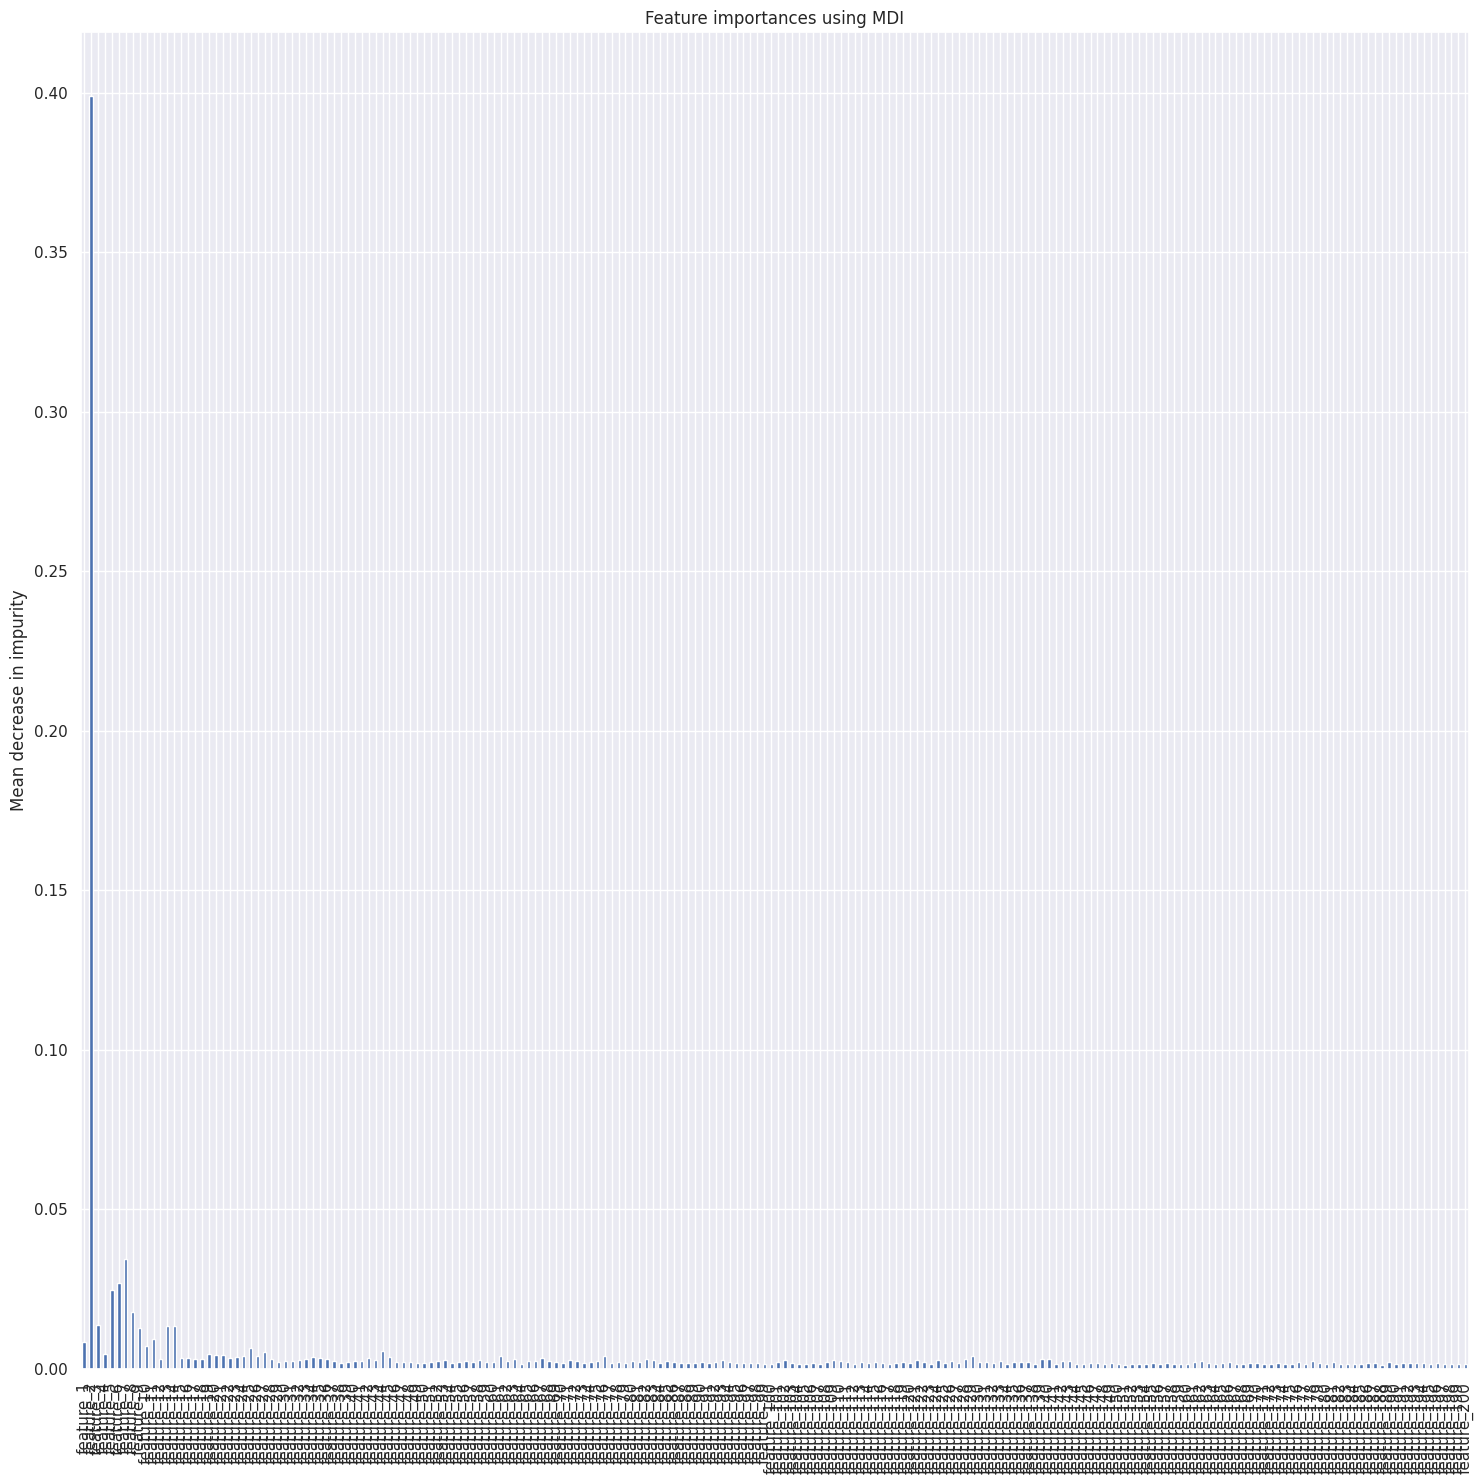

In [ ]:
file_pca_label_3_3 = testPCA(False,200,X,Y_3,Y_valid3,valid,test,Y_test_3,True,0.002)

number of features drop in the list out of  105 : 0
F score: 0.9946666666666667


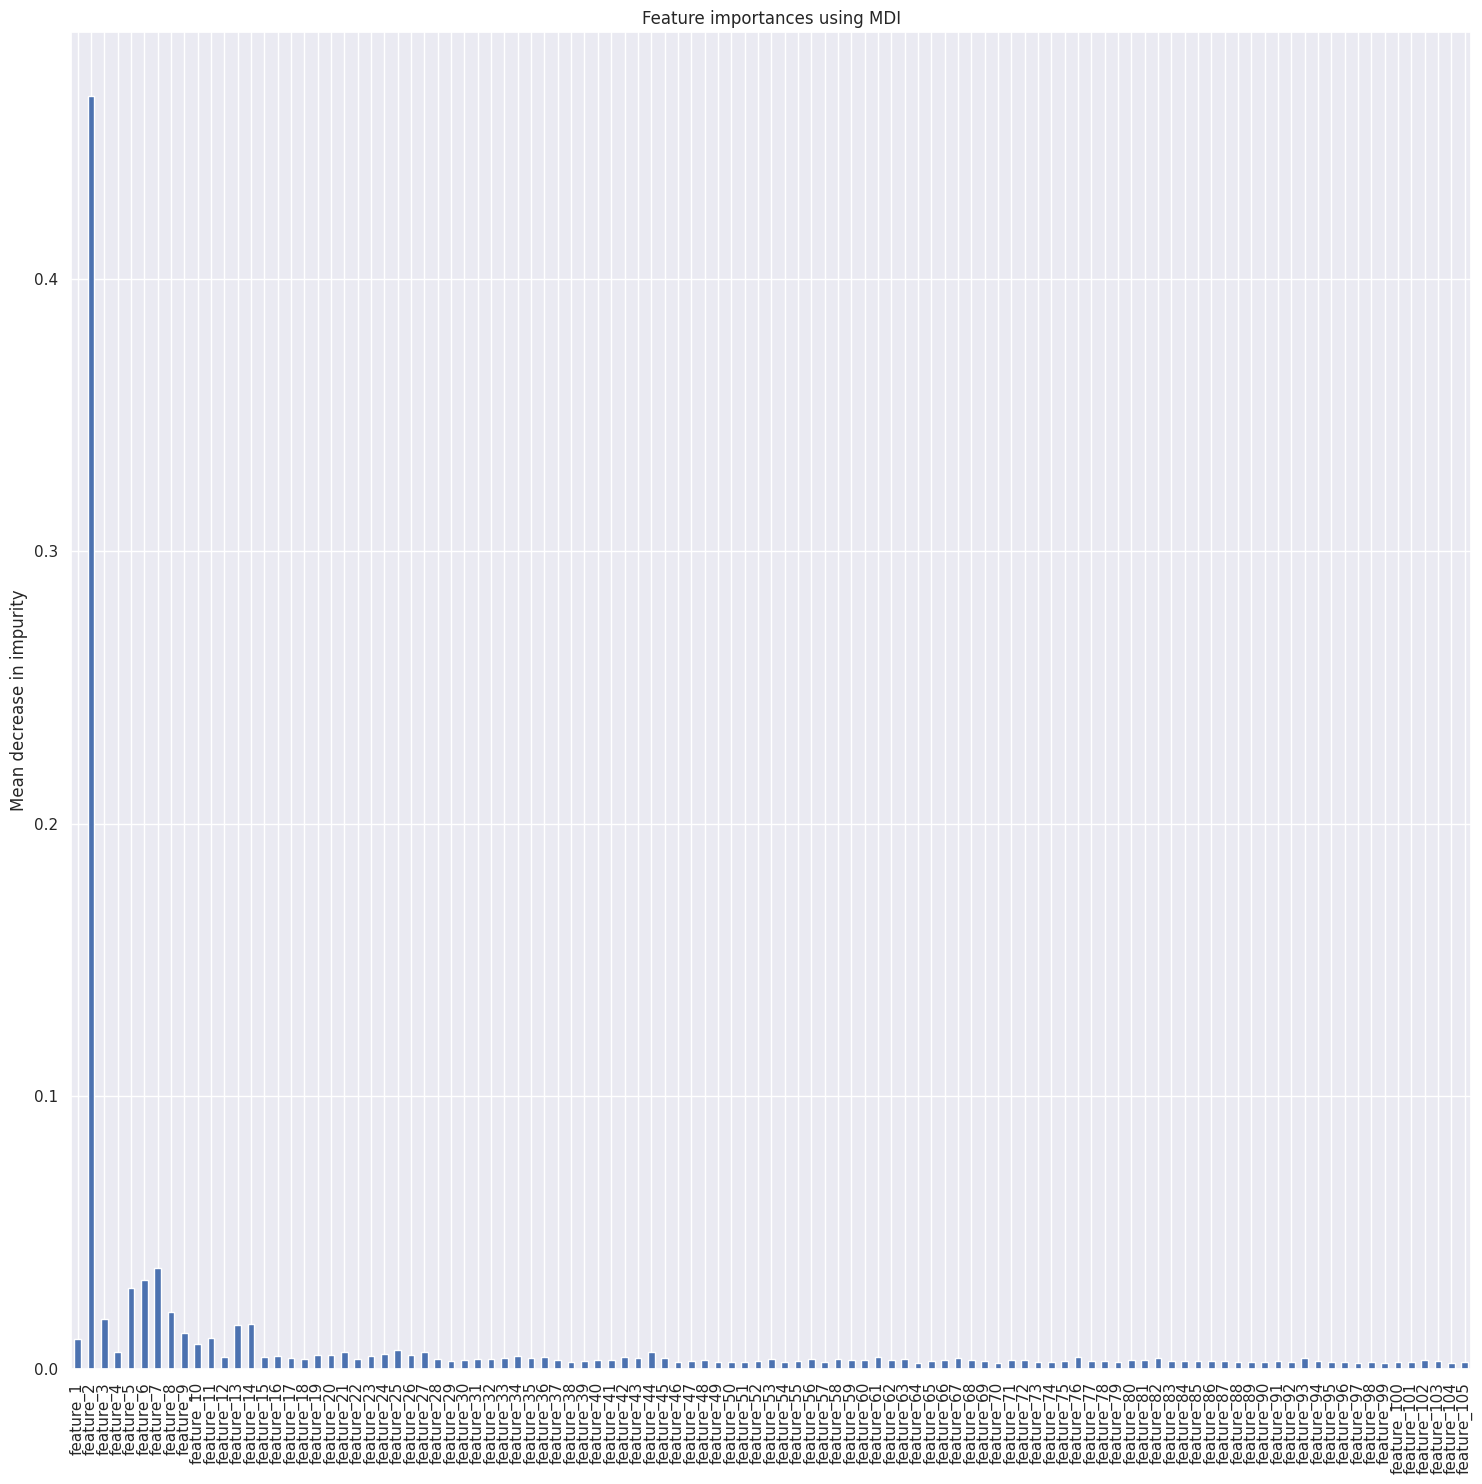

In [ ]:
file_pca_label_3_4 = testPCA(False,105,X,Y_3,Y_valid3,valid,test,Y_test_3,True,0)

**Label-4**

number of features drop in the list out of  150 : 118
F score: 0.8399999999999999


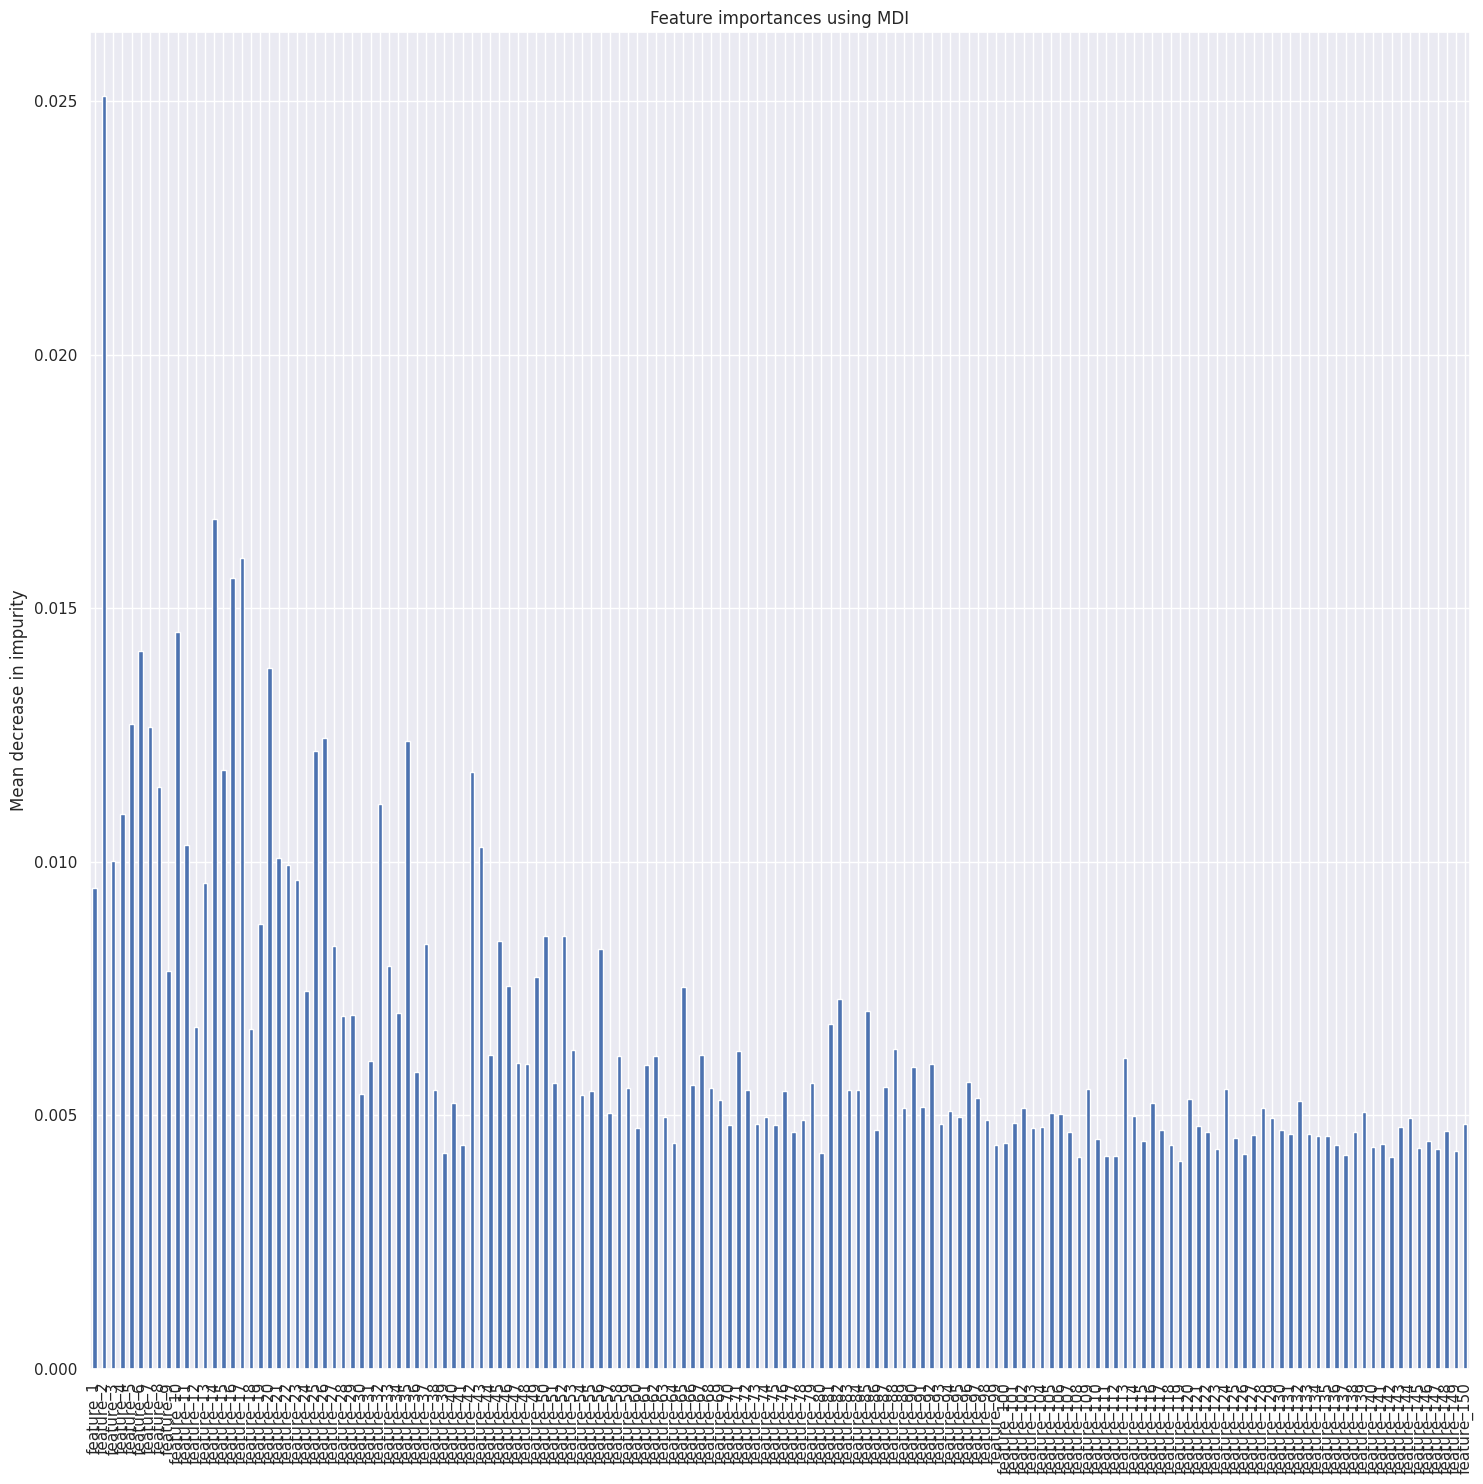

In [ ]:
file_pca_label_4_1 = testPCA(False,150,X,Y_4,Y_valid4,valid,test,Y_test_4,True,0.008)

number of features drop in the list out of  20 : 0
F score: 0.8493333333333334


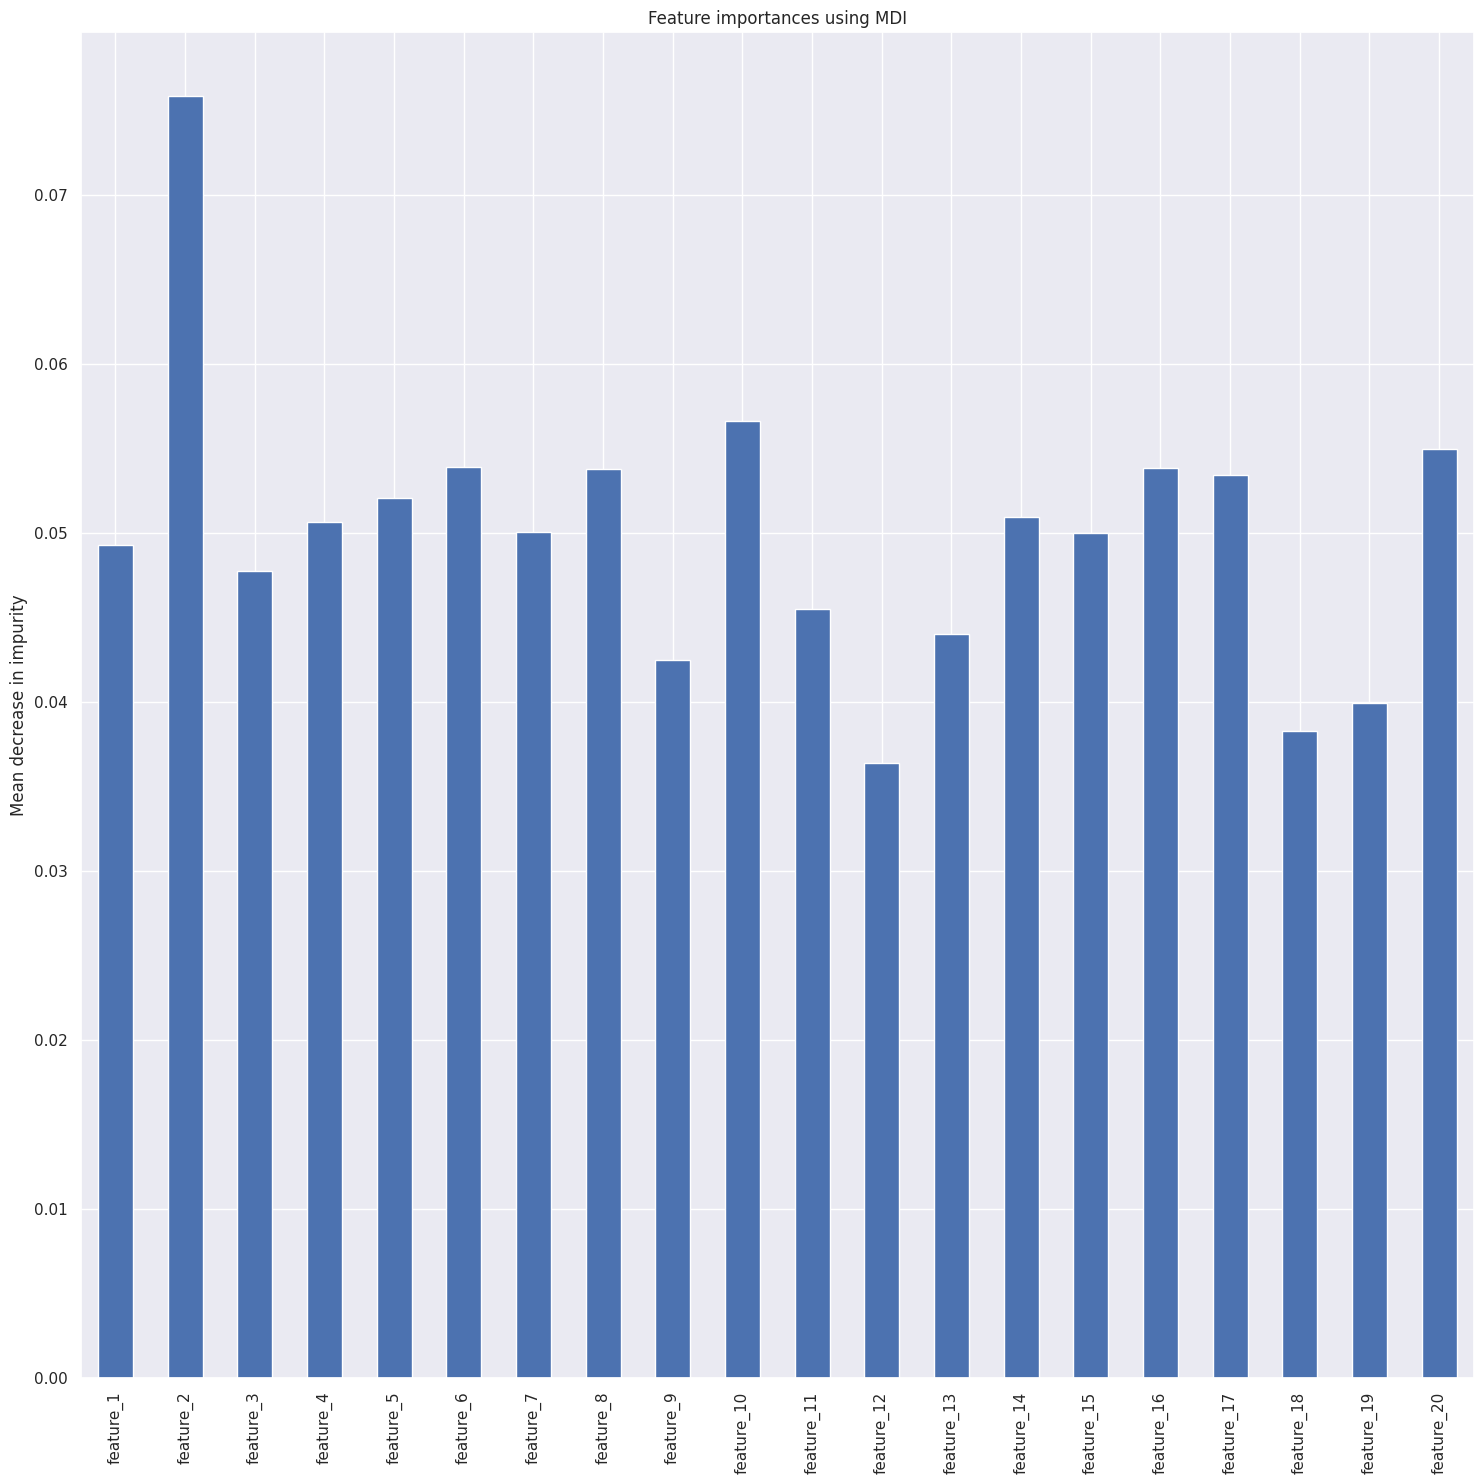

In [ ]:
file_pca_label_4_2 = testPCA(False,20,X,Y_4,Y_valid4,valid,test,Y_test_4,True,0.01)

number of features drop in the list out of  20 : 3
F score: 0.8599999999999999


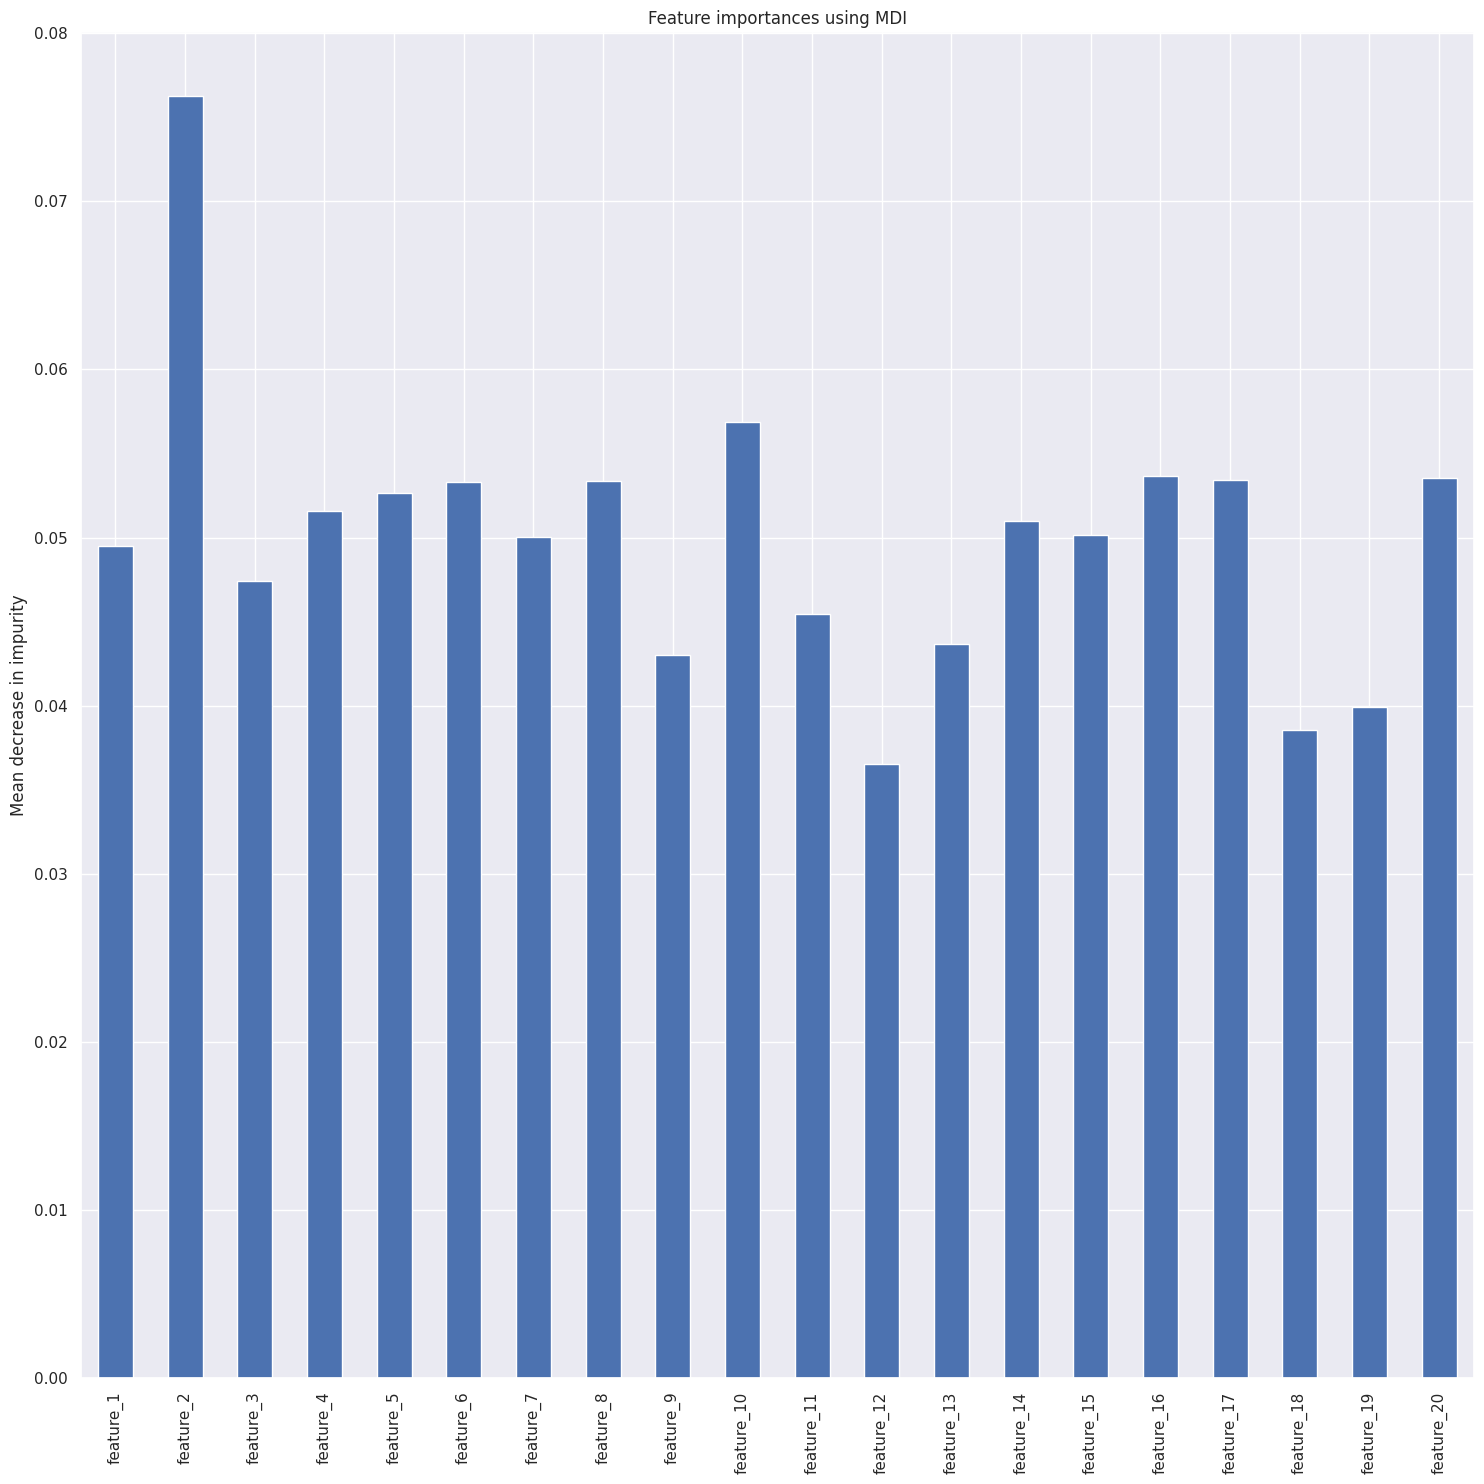

In [ ]:
file_pca_label_4_3 = testPCA(False,20,X,Y_4,Y_valid4,valid,test,Y_test_4,True,0.04)

In [ ]:
file_pca_label_4_5 = testPCA(False,18,X,Y_4,Y_valid4,valid,test,Y_test_4,False,0)

number of features drop in the list out of  18 : 0
F score: 0.8626666666666667


number of features drop in the list out of  18 : 0
F score: 0.868


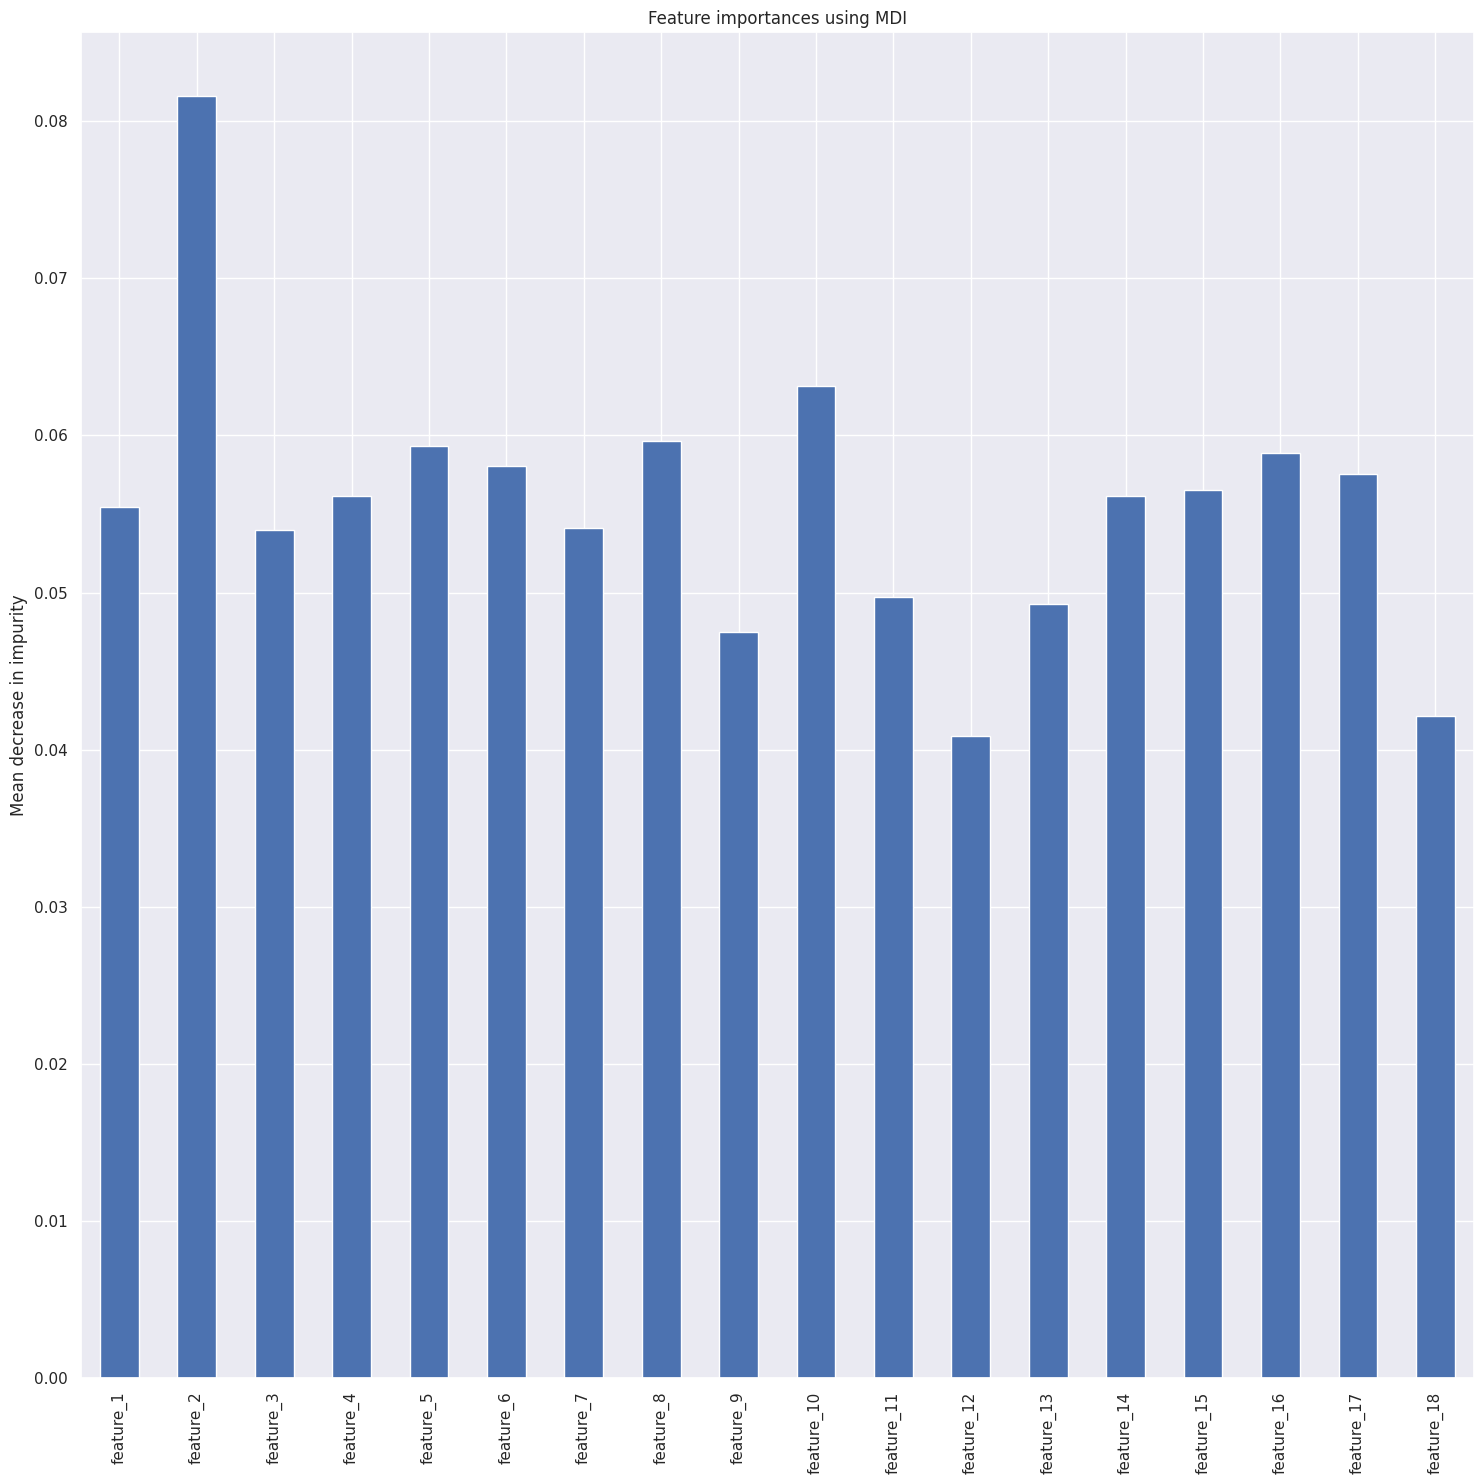

In [ ]:
file_pca_label_4_6 = testPCA(False,18,X,Y_4,Y_valid4,valid,test,Y_test_4,True,0.04)

In [ ]:
download_csv(file_pca_label_4_6,'190058R_Lab-1_label-4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

number of features drop in the list out of  40 : 32
F score: 0.7866666666666666


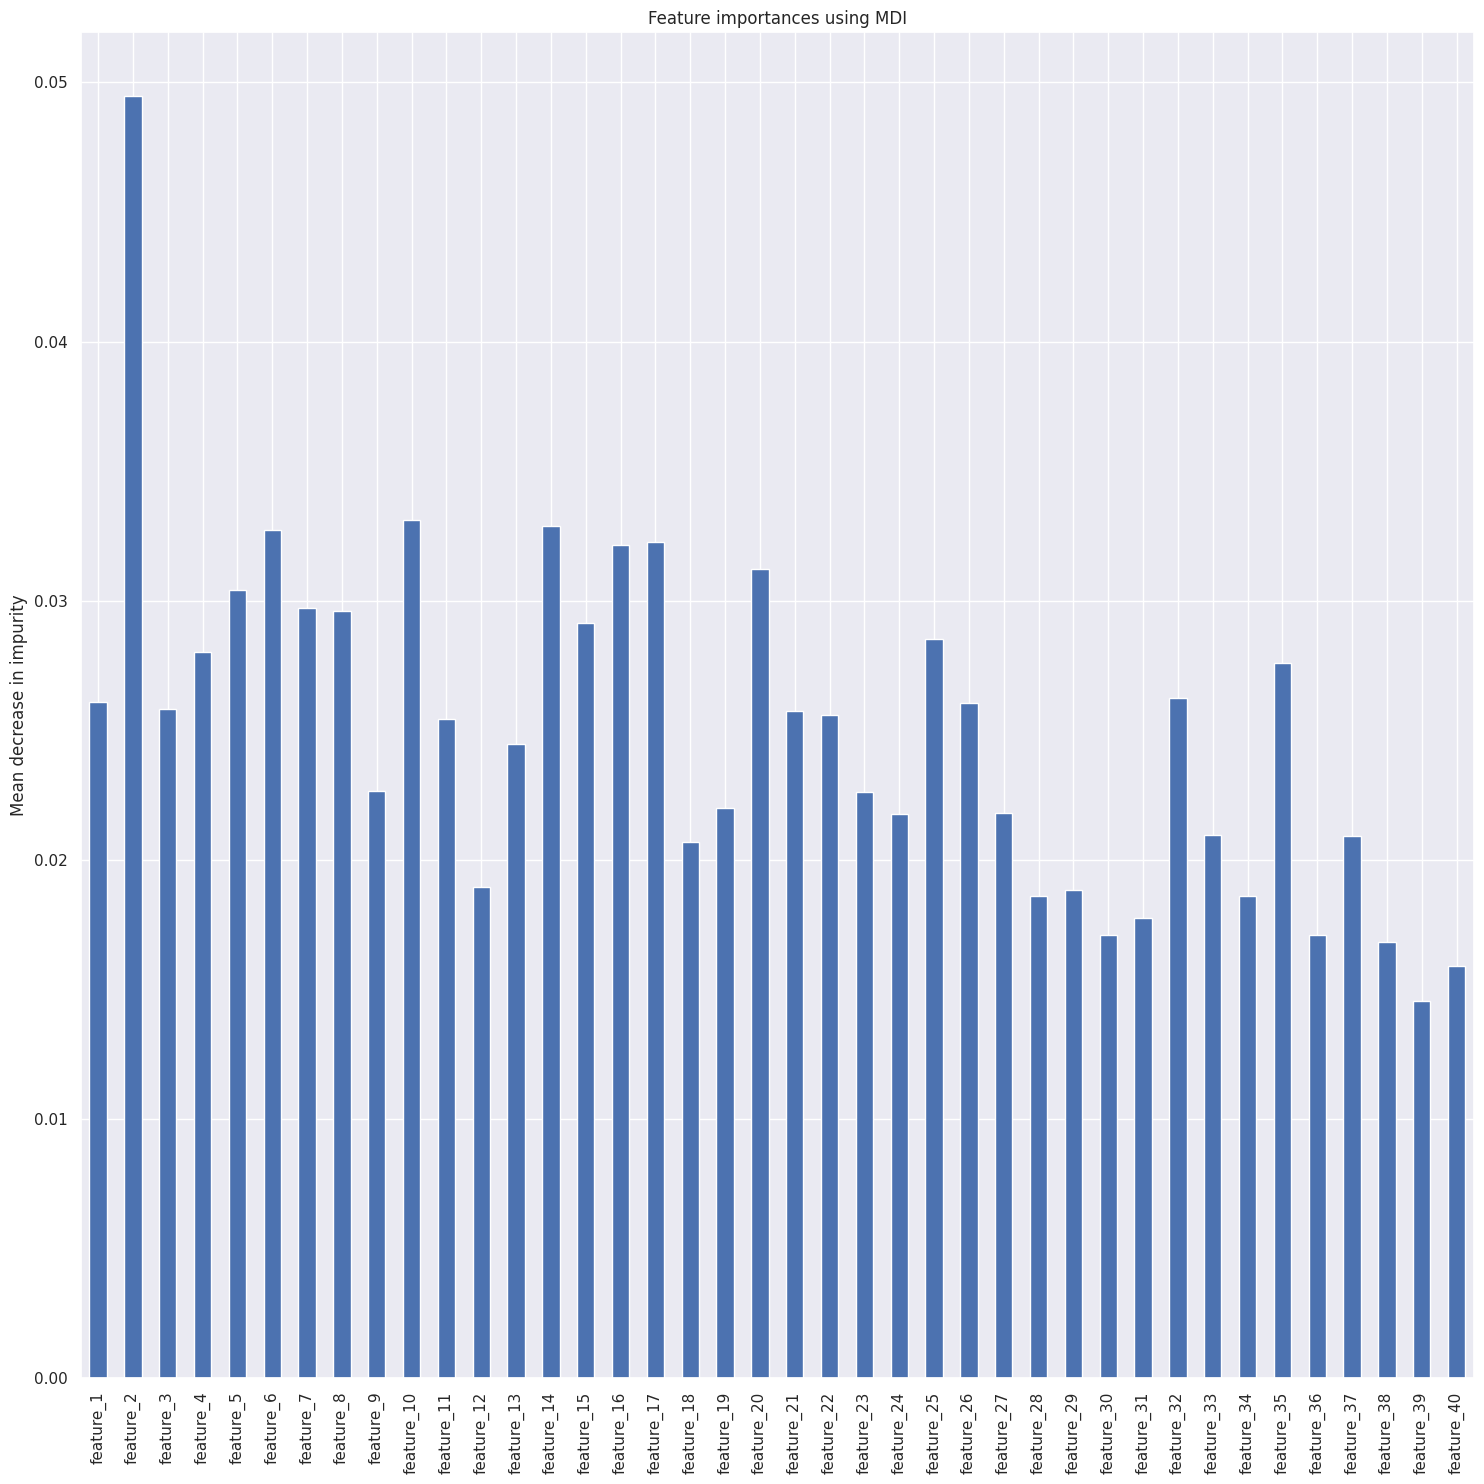

In [ ]:
file_pca_label_4_4 = testPCA(False,40,X,Y_4,Y_valid4,valid,test,Y_test_4,True,0.03)

**Without scaling PCA**

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


def testPCA1(isAccuracy,n_components,X,Y,Y_valid,valid,test,Y_test,isDiagramNeed=True,score=0.003,dropLableList=['label_1','label_2','label_3','label_4']):
  valid = valid.values
  X_valid=valid[:,0:256].copy()
  test = test.values
  X_test=test[:,0:256].copy()
  pca = PCA(n_components=n_components)
  X_train_pca = pca.fit_transform(X)
  # feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
  feature_names = [f"feature_{i+1}" for i in range(n_components)]
  forest = RandomForestClassifier(random_state=0)
  forest.fit(X_train_pca, Y)
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
  forest_importances = pd.Series(importances, index=feature_names)
  if(isDiagramNeed):
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
  label_feature_drop_list=[]
  # # print(np.min(forest_importances.values()))
  for key,value  in forest_importances.items():
    if(value<score):
      label_feature_drop_list.append(key)
  label_x_test=label_feature_drop_list.copy()
  # label_x_test.extend(dropLableList)
  print("number of features drop in the list out of ",n_components, ":",len(label_feature_drop_list))

  X_train=pd.DataFrame(X_train_pca,columns=feature_names)
  X_train = X_train.drop(columns=label_x_test)

  X_valid_pca = pca.transform(X_valid)
  X_valid = pd.DataFrame(X_valid_pca,columns=feature_names)
  X_valid = X_valid.drop(columns=label_x_test)

  X_test_pca = pca.transform(X_test)
  X_test = pd.DataFrame(X_test_pca,columns=feature_names)
  X_test = X_test.drop(columns=label_x_test)
   # Standardize the features
  X_train_scaled , X_valid_scaled , X_test_scaled = X_train.values,X_valid.values,X_test.values

  # Train a random forest classifier
  clf = RandomForestClassifier(random_state=42)
  clf.fit(X_train_scaled, Y)

  # Make predictions on the test data set
  Y_test_pred = clf.predict(X_test_scaled)
  # Make predictions on the valid data set
  Y_valid_pred = clf.predict(X_valid_scaled)
  outputDict ={}
  outputDict['Predicted labels before feature engineering']= Y_test
  outputDict['Predicted labels after feature engineering']= Y_test_pred
  outputDict['No of new features']=['' for j in range(X_test_scaled.shape[0])]
  for i in  range(0,256) :
    col_name="new_feature_"+str(i+1)
    if(i<X_test_scaled.shape[1]):
      outputDict[col_name] = X_test_scaled[:,i]
    else:
      outputDict[col_name]=[0 for j in range(X_test_scaled.shape[0])]
  if(isAccuracy):
    # Calculate accuracy
    accuracy = accuracy_score(Y_valid, Y_valid_pred)
    print("Accuracy:", accuracy)
  else:
    # Calculate F score
    accuracy = f1_score(Y_valid, Y_valid_pred,average='micro')
    print("F score:", accuracy)
  df = pd.DataFrame(outputDict)
  df['No of new features'] = X_test_scaled.shape[1]
  return df

**Label-1**

In [ ]:
file_pca_without_scale_label_1_1 = testPCA1(False,150,X,Y_1,Y_valid1,valid,test,Y_test_1,False,0)

number of features drop in the list out of  150 : 0
F score: 0.9693333333333334


In [ ]:
file_pca_without_scale_label_1_2 = testPCA1(False,220,X,Y_1,Y_valid1,valid,test,Y_test_1,False,0.002)

number of features drop in the list out of  220 : 0
F score: 0.9626666666666667


**Label-2**

In [ ]:
file_pca_without_scale_label_2_1 =testPCA1(False,60,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,False,0)

number of features drop in the list out of  60 : 0
F score: 0.9157608695652174


In [ ]:
file_pca_without_scale_label_2_2 =testPCA1(False,70,X_1,Y_2,Y_valid_2,valid_1,test,Y_test_2,False,0)

number of features drop in the list out of  70 : 0
F score: 0.907608695652174


**Label-3**

In [ ]:
file_pca_without_scale_label_3_1 = testPCA1(False,150,X,Y_3,Y_valid3,valid,test,Y_test_3,False,0.003)

number of features drop in the list out of  150 : 105
F score: 0.9946666666666667


**Label-4**

In [ ]:
file_pca_without_scale_label_4_1 = testPCA1(False,20,X,Y_4,Y_valid4,valid,test,Y_test_4,False,0.04)

number of features drop in the list out of  20 : 2
F score: 0.8573333333333333


number of features drop in the list out of  50 : 42
F score: 0.808


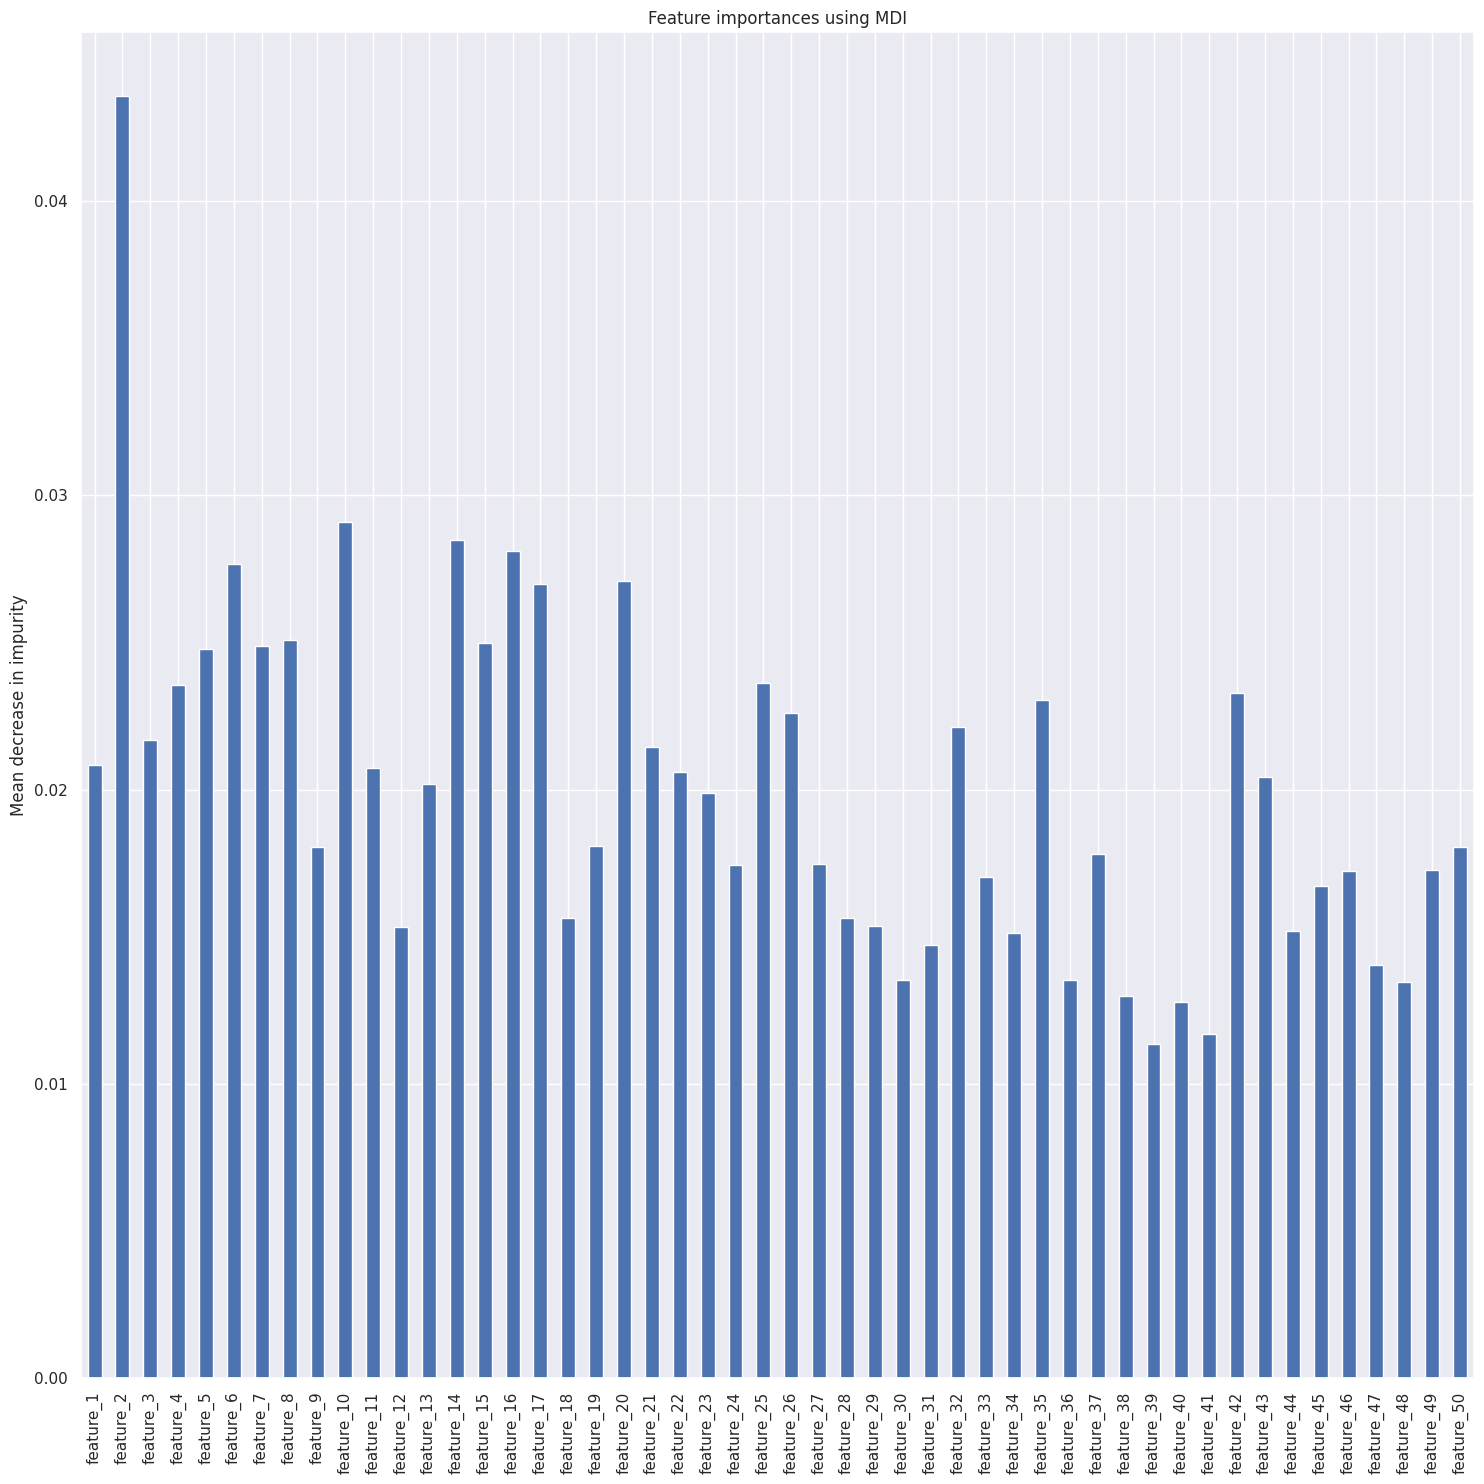

In [ ]:
file_pca_without_scale_label_4_2 = testPCA1(False,50,X,Y_4,Y_valid4,valid,test,Y_test_4,True,0.025)

#**Summary**

---


* Label - 1


Before feature engineering - 96.8%

Normal -97.6%

PCA - 96.4%

PCA without scale-96.93333333333334%



* Label - 2(F-score)


Before feature engineering - 92.25543478260869%

Normal - 93.75%

PCA -91.98369565217391%

PCA without scale -90.7608695652174%



* Label - 3(F-score)


Before feature engineering - 99.46666666666667%

Normal -99.6%

PCA -99.6%

PCA without scale -99.46666666666667%


* Label - 4(F-score)


Before feature engineering - 84.4%

Normal -85.06666666666667%

PCA - 86.8%

PCA without scale -85.73333333333333%


